In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statistics
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from scipy import linalg
from sklearn.decomposition import FastICA, PCA
from mpl_toolkits.mplot3d import Axes3D
#from sklearn.metrics.plot_confusion_matrix import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


import re
import os

In [2]:
%matplotlib inline  
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/lidiayung/miniconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['linalg']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [3]:
reg_DEGs = re.compile(r'(\S+_vs_\S+)_DEGs\.csv')

total_long = pd.DataFrame()

filenames = os.listdir('.')
for filename in filenames:
    srch = reg_DEGs.search(filename)
    if srch:
        print("Processing file: " + filename)
        tmp_df = pd.read_csv(filename,index_col=0)
        tmp_df['Sample'] = srch.group(1)
        total_long = pd.concat([total_long,tmp_df],axis=0)

total_long.to_csv('RNAseq_vs_STAT_long.csv')
total_long_fil = total_long[total_long['padj']<0.05].copy()
total_long_fil.index.name='Symbol'
total_long_fil

Processing file: OSS_vs_STAT_DEGs.csv
Processing file: TzHSS_vs_UntOSS_DEGs.csv
Processing file: Suzsilow_vs_STAT_DEGs.csv
Processing file: Ezsilow_vs_STAT_DEGs.csv
Processing file: Ntsilow_vs_STAT_DEGs.csv
Processing file: HSS_vs_STAT_DEGs.csv
Processing file: siCDK2_PSS_vs_CTL_STAT_DEGs.csv
Processing file: Plus_TzLS_vs_STAT_DEGs.csv
Processing file: TzOSS_vs_UntOSS_DEGs.csv
Processing file: UntHSS_vs_UntOSS_DEGs.csv
Processing file: siCDK2_STAT_vs_CTL_STAT_DEGs.csv
Processing file: CTL_PSS_vs_CTL_STAT_DEGs.csv
Processing file: PSS_vs_STAT_DEGs.csv
Processing file: NoTzLS_vs_STAT_DEGs.csv
Processing file: sg_vs_wt_DEGs.csv
Processing file: Plus_TzSt_vs_STAT_DEGs.csv
Processing file: LSS_vs_STAT_DEGs.csv
Processing file: SuzsiSt_vs_STAT_DEGs.csv
Processing file: EzsiSt_vs_STAT_DEGs.csv
Processing file: si_vs_wt_DEGs.csv


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Sample
Symbol,,,,,,,
AAR2,1174.048460,0.643352,0.204696,3.142960,1.672489e-03,1.649533e-02,OSS_vs_STAT
AATK,52.400196,-1.090620,0.310573,-3.511633,4.453629e-04,6.240958e-03,OSS_vs_STAT
ABCA3,1711.226047,-0.750267,0.207657,-3.613019,3.026523e-04,4.650238e-03,OSS_vs_STAT
ABCA4,80.517555,-1.384917,0.365944,-3.784507,1.540137e-04,2.762504e-03,OSS_vs_STAT
ABCA6,2001.344066,-1.667623,0.385061,-4.330798,1.485697e-05,4.458025e-04,OSS_vs_STAT
ABCA7,123.039222,-0.941898,0.309807,-3.040272,2.363648e-03,2.138134e-02,OSS_vs_STAT
ABCA8,498.923524,-1.253469,0.329812,-3.800555,1.443723e-04,2.620639e-03,OSS_vs_STAT
ABCB1,194.910658,0.945781,0.261154,3.621550,2.928429e-04,4.554434e-03,OSS_vs_STAT
ABCC2,100.953931,1.086883,0.340528,3.191756,1.414106e-03,1.461040e-02,OSS_vs_STAT


In [3]:
total_long_fil_raw=pd.read_csv("/Users/lidiayung/Downloads/pone.0253178.s006.txt",sep='\t')

In [4]:
total_long_fil_raw

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
Copb2,1.079976e-11,0.750248,0.128,0.668,2.138460e-07,0,Copb2
Tcf25,3.918272e-11,1.011743,0.221,0.791,7.758570e-07,0,Tcf25
Atp11b,1.197343e-10,10.492430,0.065,0.568,2.370859e-06,0,Atp11b
H2afy,2.446372e-10,3.553818,0.222,0.767,4.844062e-06,0,H2afy
Macf1,3.572862e-10,1.670983,0.083,0.648,7.074624e-06,0,Macf1
...,...,...,...,...,...,...,...
Kcnk3,7.320950e-03,112.062013,0.211,0.006,1.000000e+00,7,Kcnk3
Mcee,8.593882e-03,47.196054,0.526,0.320,1.000000e+00,7,Mcee
Gstm21,8.622137e-03,3.039360,0.411,0.183,1.000000e+00,7,Gstm2
Sdf2l1,8.853169e-03,12.013508,0.474,0.220,1.000000e+00,7,Sdf2l1


In [58]:
total_long_fil_raw.loc[total_wide.columns[cols_with_inf]]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
Txn1,5.030546e-08,inf,0.641,0.875,9.960985e-04,0,Txn1
Hspa5,1.302894e-07,inf,0.945,0.438,2.579860e-03,1,Hspa5
Ifitm3,6.251137e-10,inf,0.937,0.590,1.237788e-05,1,Ifitm3
Ly6a,7.055856e-12,inf,0.961,0.403,1.397130e-07,1,Ly6a
Neat1,1.854978e-10,inf,0.976,0.470,3.673042e-06,1,Neat1
Nupr1,3.355428e-09,inf,0.838,0.304,6.644083e-05,1,Nupr1
S100a10,6.474494e-10,inf,0.939,0.496,1.282015e-05,1,S100a10
Fam25c,1.484861e-16,inf,0.979,0.227,2.940173e-12,3,Fam25c
Vim,1.231671e-16,inf,0.973,0.106,2.438832e-12,4,Vim


In [133]:
total_long_fil_raw.max()

p_val        0.009982
avg_logFC         inf
pct.1             1.0
pct.2           0.875
p_val_adj         1.0
cluster             7
gene              Zyx
dtype: object

In [134]:
total_long_fil['avg_logFC'].sort_values(ascending=False).head(10)

S100a1      533.914096
Sbsn        413.574154
Anxa2       402.701082
S100a14     370.700747
Isg15       367.701082
Dcn         330.178914
Ly6e        325.701948
Map1lc3b    300.674879
Sat1        297.701082
Zfand5      292.701003
Name: avg_logFC, dtype: float64

In [71]:
np.min(total_long_fil_raw['avg_logFC'])

0.200330129514882

In [56]:
total_long_fil_raw.loc['Neat1']

p_val             0.0
avg_logFC         inf
pct.1           0.976
pct.2            0.47
p_val_adj    0.000004
cluster             1
gene            Neat1
Name: Neat1, dtype: object

In [6]:
total_long_fil=total_long_fil_raw[total_long_fil_raw['p_val_adj']<0.05]

In [7]:
shape(total_long_fil)

(914, 7)

In [14]:
#Mine 
long_raw=pd.read_csv("/Users/lidiayung/Downloads/uro.markers.csv",sep=',')

In [15]:
shape(long_raw)

(5709, 7)

In [16]:
long_raw

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
0,0.000000,0.187340,0.137,0.536,0.0,0,Clec4e
1,0.000000,0.618851,0.319,0.714,0.0,0,Pthlh
2,0.000000,0.216728,0.329,0.723,0.0,0,Blvrb
3,0.000000,0.277513,0.445,0.839,0.0,0,Ost4
4,0.000000,0.735666,0.216,0.609,0.0,0,Klk11
...,...,...,...,...,...,...,...
5704,0.006517,1.342464,0.566,0.532,1.0,8,B3galt2
5705,0.007557,0.572825,0.192,0.248,1.0,8,Rcn3
5706,0.007598,4.515561,0.010,0.099,1.0,8,Nxpe5
5707,0.007879,1.356356,0.606,0.559,1.0,8,Aurka


In [17]:
long_filtered = long_raw[long_raw['p_val_adj']<0.05]
shape(long_filtered)

(5400, 7)

In [93]:
long_filtered = long_filtered[long_filtered['cluster'].isin([0, 1, 2, 3, 4, 5])]

In [94]:
total_long_fil

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
Copb2,1.079976e-11,0.750248,0.128,0.668,2.138460e-07,0,Copb2
Tcf25,3.918272e-11,1.011743,0.221,0.791,7.758570e-07,0,Tcf25
Atp11b,1.197343e-10,10.492430,0.065,0.568,2.370859e-06,0,Atp11b
H2afy,2.446372e-10,3.553818,0.222,0.767,4.844062e-06,0,H2afy
Macf1,3.572862e-10,1.670983,0.083,0.648,7.074624e-06,0,Macf1
...,...,...,...,...,...,...,...
Plxdc2,1.633774e-06,16.474194,0.724,0.192,3.235036e-02,5,Plxdc2
Gpc61,1.666817e-06,0.975689,0.369,0.028,3.300464e-02,5,Gpc6
Eln,1.684302e-06,35.604364,0.429,0.007,3.335086e-02,5,Eln
Dpt,1.751507e-06,19.526793,0.401,0.007,3.468159e-02,5,Dpt


In [18]:
total_long_fil.index

Index(['Copb2', 'Tcf25', 'Atp11b', 'H2afy', 'Macf1', 'Atp2a2', 'Rad23b',
       'Clint1', 'Kdm5b', 'Mycbp2',
       ...
       'Lpar11', 'Sulf1', 'Svep1', 'Clmp', 'Sspn', 'Plxdc2', 'Gpc61', 'Eln',
       'Dpt', 'Fmo2'],
      dtype='object', length=889)

In [100]:
total_long_fil.columns

Index(['p_val', 'avg_logFC', 'pct.1', 'pct.2', 'p_val_adj', 'cluster', 'gene'], dtype='object')

In [101]:
inf_mask = np.isinf(total_long_fil['avg_logFC'])


In [103]:
total_long_fil[inf_mask]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
Txn1,5.030546e-08,inf,0.641,0.875,9.960985e-04,0,Txn1
Ly6a,7.055856e-12,inf,0.961,0.403,1.397130e-07,1,Ly6a
Neat1,1.854978e-10,inf,0.976,0.470,3.673042e-06,1,Neat1
Ifitm3,6.251137e-10,inf,0.937,0.590,1.237788e-05,1,Ifitm3
S100a10,6.474494e-10,inf,0.939,0.496,1.282015e-05,1,S100a10
Nupr1,3.355428e-09,inf,0.838,0.304,6.644083e-05,1,Nupr1
Hspa5,1.302894e-07,inf,0.945,0.438,2.579860e-03,1,Hspa5
Fam25c,1.484861e-16,inf,0.979,0.227,2.940173e-12,3,Fam25c
Vim,1.231671e-16,inf,0.973,0.106,2.438832e-12,4,Vim


In [ ]:
total_long_fil.replace([np.inf], np.nan, inplace=True)

In [107]:
total_long_fil[inf_mask]

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
Txn1,5.030546e-08,NaN,0.641,0.875,9.960985e-04,0,Txn1
Ly6a,7.055856e-12,NaN,0.961,0.403,1.397130e-07,1,Ly6a
Neat1,1.854978e-10,NaN,0.976,0.470,3.673042e-06,1,Neat1
Ifitm3,6.251137e-10,NaN,0.937,0.590,1.237788e-05,1,Ifitm3
S100a10,6.474494e-10,NaN,0.939,0.496,1.282015e-05,1,S100a10
Nupr1,3.355428e-09,NaN,0.838,0.304,6.644083e-05,1,Nupr1
Hspa5,1.302894e-07,NaN,0.945,0.438,2.579860e-03,1,Hspa5
Fam25c,1.484861e-16,NaN,0.979,0.227,2.940173e-12,3,Fam25c
Vim,1.231671e-16,NaN,0.973,0.106,2.438832e-12,4,Vim


In [ ]:
total_long_fil[inf_mask]

In [121]:
total_long_fil[total_long_fil['cluster']==0]['avg_logFC'].sort_values(ascending=False)

Dsp         146.664608
Gm26917     139.657893
Ifitm2       77.664608
Ptgr1        36.664608
Eif6         33.664608
Txndc17      30.646433
Evpl         28.654183
Ppl          24.664608
Cstb         22.357738
Rab24        15.462210
Tuba4a       12.664304
Gng12        12.658448
Mtch2        12.220851
Atp11b       10.492430
Mpzl2        10.114888
Ctsc          8.663443
Mycbp2        7.330178
Trim29        6.664625
Kdm5b         6.598877
Myo18a        6.066019
Rad23b        5.327499
Atp2a2        4.664606
Clint1        4.664549
Slc6a8        4.487546
Ckmt1         4.477505
Bicd2         4.357841
Etfa          4.275362
Il17rc        3.756608
Ppp1r2        3.646369
Atp1b3        3.613656
H2afy         3.553818
Abracl        2.663694
Sptan1        2.639531
Cdc42bpb      2.611899
Ppp2r5a       2.257282
Tfg           2.019935
Trip11        1.743324
Macf1         1.670983
Hook3         1.639305
Pcdh1         1.610074
Chd9          1.524835
Tcf25         1.011743
Dtnbp1        0.876690
Copb2      

In [104]:
total_long_fil.replace([np.inf], np.nan, inplace=True)

In [114]:
print(imputer.fit_transform(total_long_fil[inf_mask]['avg_logFC']))


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [106]:
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(total_long_fil['avg_logFC'])

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [17]:
inf_mask = np.isinf(total_long_fil)

total_long_fil[total_long_fil['gene']=='8430408G22Rik']

,p_val,avg_logFC,pct.1,pct.2,p_val_adj,cluster,gene
8430408G22Rik,2.746278e-10,42.907439,0.7,0.057,0.000005,2,8430408G22Rik


In [20]:
total_wide=total_long_fil.pivot_table(index='cluster',columns=total_long_fil.index,values='avg_logFC').fillna(0)

In [29]:
import numpy as np
from sklearn.impute import KNNImputer


889

In [ ]:
total_wide.replace([np.inf], np.nan, inplace=True)

imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(total_wide)

In [22]:
total_wide.T.to_csv('RNAseq_mus_nor_bl_wide.csv')


In [4]:
# transforiming to wide format
total_wide=total_long_fil.pivot_table(index='Sample',columns=['cluster'],values='avg_logFC').fillna(0)
df_trivial = pd.DataFrame([np.zeros(len(total_wide.columns))], columns=total_wide.columns, index=['STAT_vs_STAT'])
total_wide = pd.concat([total_wide,df_trivial],axis=0).copy()
total_wide.T.to_csv('RNAseq_vs_STAT_wide.csv')
# removing old PRC2 KNs
#total_wide.drop(labels=['EZLSS_vs_STAT','EZST_vs_STAT','LSS_Kns_vs_STAT','SUZLSS_vs_STAT','SUZST_vs_STAT'],inplace=True,axis='index')
total_wide

Symbol,A1BG,A1BG-AS1,A2M,A2M-AS1,A4GALT,AAAS,AAAS_1,AACS,AADAC,AADACP1,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZYX_1,ZZEF1,ZZZ3
CTL_PSS_vs_CTL_STAT,0.000000,0.000000,0.000000,-1.321978,0.000000,-0.426488,-0.729360,-0.408361,2.635887,0.000000,...,0.000000,-0.325294,0.303927,0.836621,0.000000,-0.497239,0.800973,0.759847,0.000000,0.000000
EzsiSt_vs_STAT,0.000000,0.000000,0.878084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.201891,0.248122,0.227079,0.000000,0.000000
Ezsilow_vs_STAT,0.000000,-3.836974,0.721672,0.000000,-0.543100,-0.329317,0.000000,-0.413289,1.522015,1.293113,...,0.000000,0.000000,0.000000,0.365317,0.000000,-0.145964,0.966268,0.973464,0.337084,-0.539051
HSS_vs_STAT,0.000000,0.000000,0.000000,-1.270739,0.000000,-0.867316,-0.754382,0.000000,0.000000,0.000000,...,0.000000,-0.717565,0.000000,0.994218,0.000000,0.000000,1.399044,1.394673,0.806451,0.000000
LSS_vs_STAT,0.000000,0.000000,-0.821225,0.000000,-0.603028,-1.071432,-1.024142,-0.417962,0.000000,0.000000,...,-0.877941,0.000000,0.000000,0.999536,0.000000,0.000000,0.923735,0.960641,0.586130,0.000000
NoTzLS_vs_STAT,0.000000,0.000000,-0.228432,-1.374863,-1.057965,-0.717413,-0.688529,-0.366281,0.000000,0.945570,...,-0.281675,0.000000,0.505315,0.691086,0.000000,-0.244784,0.845785,0.702761,0.561672,-0.229899
Ntsilow_vs_STAT,0.000000,0.000000,0.000000,0.000000,-0.740619,-0.350265,0.000000,-0.321615,0.000000,0.845001,...,0.000000,0.000000,0.000000,0.535042,0.000000,0.000000,0.836232,0.833882,0.474604,-0.397460
OSS_vs_STAT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.629960,0.684052,0.000000,0.000000
PSS_vs_STAT,0.000000,0.000000,0.000000,-2.130666,0.000000,-0.958575,-0.983210,0.000000,2.501492,1.148968,...,-1.114237,0.000000,0.000000,0.815359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Plus_TzLS_vs_STAT,0.000000,0.000000,-0.169618,0.000000,-0.296333,-0.699578,-0.995599,-0.449994,0.000000,0.446485,...,-1.172501,-0.372082,0.591749,0.730088,0.000000,-0.457150,1.043442,0.955275,0.000000,-0.529754


In [5]:
# performing batch correction for the samples, which were not siRNA transfected
smpls_corr = ['HSS_vs_STAT','Plus_TzLS_vs_STAT','Plus_TzSt_vs_STAT','NoTzLS_vs_STAT']
for smpl_corr in smpls_corr:
    total_wide.loc[smpl_corr] = total_wide.loc[smpl_corr].add(total_wide.loc['si_vs_wt'])

smpls_corr = ['TzHSS_vs_UntOSS','TzOSS_vs_UntOSS','UntHSS_vs_UntOSS']
for smpl_corr in smpls_corr:
    total_wide.loc[smpl_corr] = total_wide.loc[smpl_corr].add(total_wide.loc['OSS_vs_STAT'])

total_wide.T.to_csv('RNAseq_vs_STAT_wide.csv')
total_wide

Symbol,A1BG,A1BG-AS1,A2M,A2M-AS1,A4GALT,AAAS,AAAS_1,AACS,AADAC,AADACP1,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZYX_1,ZZEF1,ZZZ3
CTL_PSS_vs_CTL_STAT,0.000000,0.000000,0.000000,-1.321978,0.000000,-0.426488,-0.729360,-0.408361,2.635887,0.000000,...,0.000000,-0.325294,0.303927,0.836621,0.000000,-0.497239,0.800973,0.759847,0.000000,0.000000
EzsiSt_vs_STAT,0.000000,0.000000,0.878084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.201891,0.248122,0.227079,0.000000,0.000000
Ezsilow_vs_STAT,0.000000,-3.836974,0.721672,0.000000,-0.543100,-0.329317,0.000000,-0.413289,1.522015,1.293113,...,0.000000,0.000000,0.000000,0.365317,0.000000,-0.145964,0.966268,0.973464,0.337084,-0.539051
HSS_vs_STAT,0.000000,0.000000,1.002831,-1.270739,0.000000,-0.621394,-0.754382,0.000000,0.000000,0.000000,...,0.681756,-0.717565,0.000000,0.994218,0.000000,0.000000,1.174678,1.242858,0.806451,0.000000
LSS_vs_STAT,0.000000,0.000000,-0.821225,0.000000,-0.603028,-1.071432,-1.024142,-0.417962,0.000000,0.000000,...,-0.877941,0.000000,0.000000,0.999536,0.000000,0.000000,0.923735,0.960641,0.586130,0.000000
NoTzLS_vs_STAT,0.000000,0.000000,0.774399,-1.374863,-1.057965,-0.471491,-0.688529,-0.366281,0.000000,0.945570,...,0.400081,0.000000,0.505315,0.691086,0.000000,-0.244784,0.621419,0.550946,0.561672,-0.229899
Ntsilow_vs_STAT,0.000000,0.000000,0.000000,0.000000,-0.740619,-0.350265,0.000000,-0.321615,0.000000,0.845001,...,0.000000,0.000000,0.000000,0.535042,0.000000,0.000000,0.836232,0.833882,0.474604,-0.397460
OSS_vs_STAT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.629960,0.684052,0.000000,0.000000
PSS_vs_STAT,0.000000,0.000000,0.000000,-2.130666,0.000000,-0.958575,-0.983210,0.000000,2.501492,1.148968,...,-1.114237,0.000000,0.000000,0.815359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Plus_TzLS_vs_STAT,0.000000,0.000000,0.833213,0.000000,-0.296333,-0.453656,-0.995599,-0.449994,0.000000,0.446485,...,-0.490745,-0.372082,0.591749,0.730088,0.000000,-0.457150,0.819076,0.803460,0.000000,-0.529754


In [30]:
total_wide

,1700012B09Rik,2010111I01Rik,3830403N18Rik,4930402H24Rik,4930503L19Rik,8430408G22Rik,9230102O04Rik,9530036O11Rik,AC191865.2,AI314180,...,Zdhhc2,Zdhhc5,Zfand5,Zfp185,Zfp266,Zfp36,Zfp36l1,Zkscan3,Zmat5,Znrf2
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.301922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.274367,0.000000,0.000000
1,0.000000,27.694647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.710968,292.701003,6.842593,0.000000,47.701076,73.749656,0.000000,0.000000,10.920631
2,0.000000,0.000000,0.000000,7.545319,0.000000,42.907439,5.414635,11.334703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.406982,0.000000,0.000000,0.000000,4.542878,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,69.420093,0.000000,7.732908,0.000000,2.395527,0.000000,0.000000,0.000000,7.179733,0.000000,...,7.373569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [38]:
import numpy as np

# Create a boolean mask to identify infinite values
inf_mask = np.isinf(total_wide)

# Filter the DataFrame to show rows and columns where infinite values are present
rows_with_inf, cols_with_inf = np.where(inf_mask)

# Print the indices of rows and columns where infinite values are present
for row, col in zip(rows_with_inf, cols_with_inf):
    print(f"Row: {row}, Column: {col}")


Row: 0, Column: 837
Row: 1, Column: 385
Row: 1, Column: 395
Row: 1, Column: 457
Row: 1, Column: 533
Row: 1, Column: 553
Row: 1, Column: 685
Row: 3, Column: 282
Row: 4, Column: 861


In [69]:
np.min(total_wide_raw)

0.0

In [52]:
total_wide.columns[cols_with_inf]

Index(['Txn1', 'Hspa5', 'Ifitm3', 'Ly6a', 'Neat1', 'Nupr1', 'S100a10',
       'Fam25c', 'Vim'],
      dtype='object')

In [47]:
total_wide['Neat1'].sort_values()

cluster
0    0.0
2    0.0
3    0.0
4    0.0
5    0.0
1    inf
Name: Neat1, dtype: float64

In [23]:
pca = PCA(n_components=3)
Spca = pca.fit_transform(total_wide)
print("Explained variances by components: ", pca.explained_variance_ratio_, "total variance explained: ",sum(pca.explained_variance_ratio_))
PCA_df = pd.DataFrame(Spca[:,:3],columns=['PC1','PC2','PC3'],index=total_wide.index)
PCA_df

ValueError: Input X contains infinity or a value too large for dtype('float64').

<IPython.core.display.Javascript object>


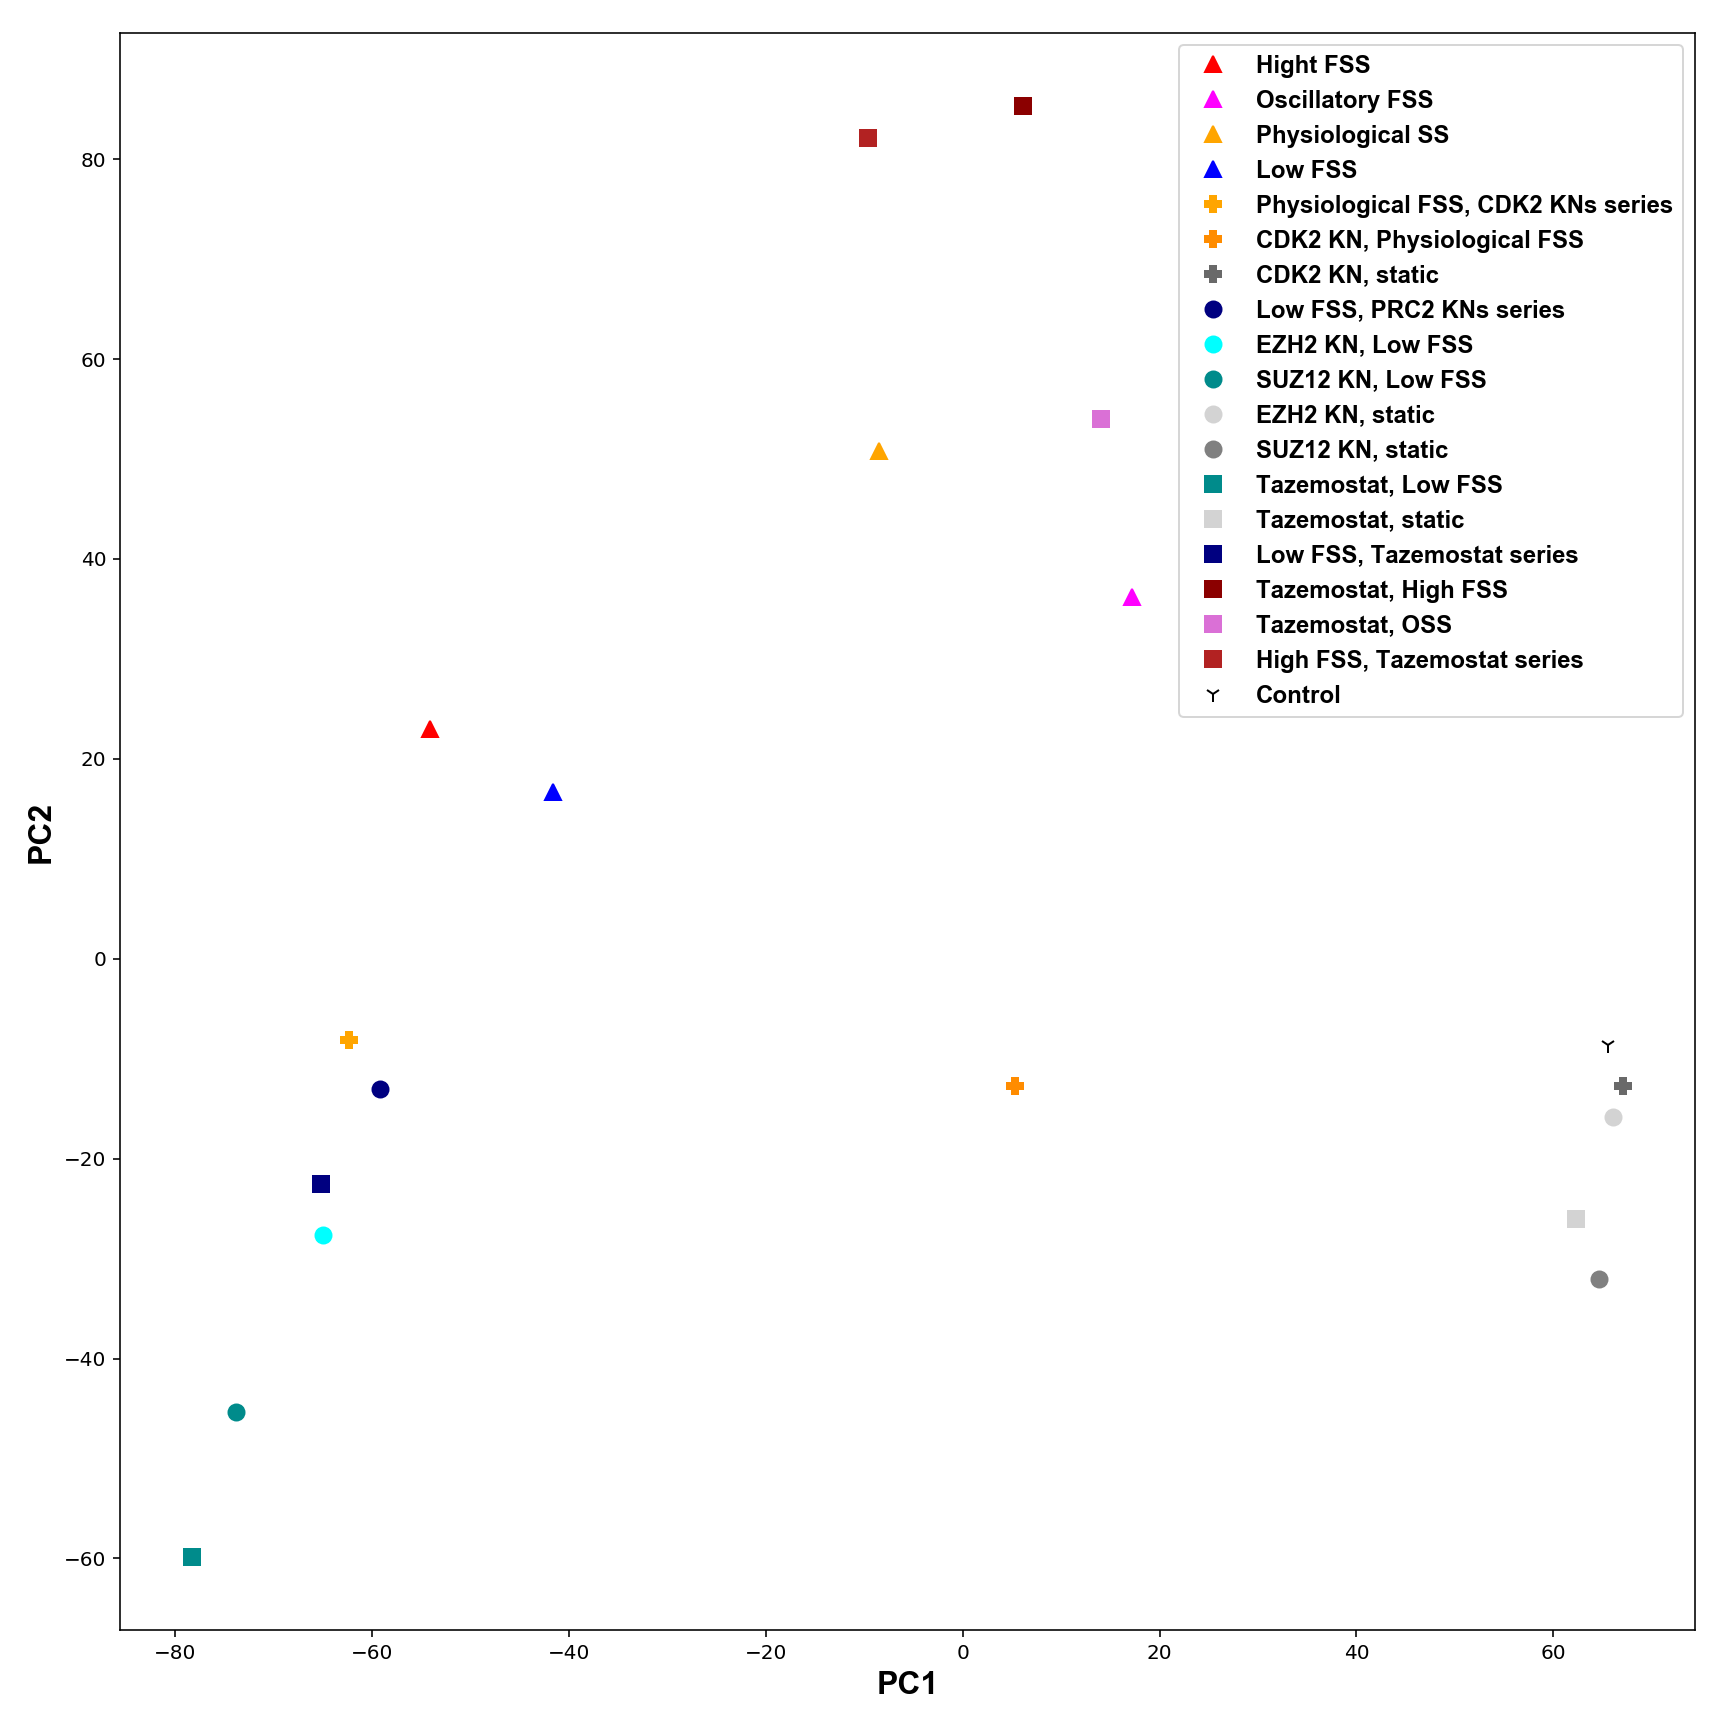

In [7]:
# 2D visualization


fig = plt.figure(figsize=(12,12))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

#plt.suptitle('PhosphoSite fold changes',**fontTitle)

# FSS conditions
ax.plot([PCA_df.loc['HSS_vs_STAT'].iloc[0]],[PCA_df.loc['HSS_vs_STAT'].iloc[1]],'^',color='red',label='Hight FSS',ms=8)
ax.plot([PCA_df.loc['OSS_vs_STAT'].iloc[0]],[PCA_df.loc['OSS_vs_STAT'].iloc[1]],'^',color='magenta',label='Oscillatory FSS',ms=8)
ax.plot([PCA_df.loc['PSS_vs_STAT'].iloc[0]],[PCA_df.loc['PSS_vs_STAT'].iloc[1]],'^',color='orange',label='Physiological SS',ms=8)
ax.plot([PCA_df.loc['LSS_vs_STAT'].iloc[0]],[PCA_df.loc['LSS_vs_STAT'].iloc[1]],'^',color='blue',label='Low FSS',ms=8)

# CDK2 KNs
ax.plot([PCA_df.loc['CTL_PSS_vs_CTL_STAT'].iloc[0]],[PCA_df.loc['CTL_PSS_vs_CTL_STAT'].iloc[1]],'P',color='orange',label='Physiological FSS, CDK2 KNs series',ms=8)
ax.plot([PCA_df.loc['siCDK2_PSS_vs_CTL_STAT'].iloc[0]],[PCA_df.loc['siCDK2_PSS_vs_CTL_STAT'].iloc[1]],'P',color='darkorange',label='CDK2 KN, Physiological FSS',ms=8)
ax.plot([PCA_df.loc['siCDK2_STAT_vs_CTL_STAT'].iloc[0]],[PCA_df.loc['siCDK2_STAT_vs_CTL_STAT'].iloc[1]],'P',color='dimgrey',label='CDK2 KN, static',ms=8)

# PRC2 KNs
ax.plot([PCA_df.loc['Ntsilow_vs_STAT'].iloc[0]],[PCA_df.loc['Ntsilow_vs_STAT'].iloc[1]],'o',color='navy',label='Low FSS, PRC2 KNs series',ms=8)
ax.plot([PCA_df.loc['Ezsilow_vs_STAT'].iloc[0]],[PCA_df.loc['Ezsilow_vs_STAT'].iloc[1]],'o',color='cyan',label='EZH2 KN, Low FSS',ms=8)
ax.plot([PCA_df.loc['Suzsilow_vs_STAT'].iloc[0]],[PCA_df.loc['Suzsilow_vs_STAT'].iloc[1]],'o',color='darkcyan',label='SUZ12 KN, Low FSS',ms=8)
ax.plot([PCA_df.loc['EzsiSt_vs_STAT'].iloc[0]],[PCA_df.loc['EzsiSt_vs_STAT'].iloc[1]],'o',color='lightgrey',label='EZH2 KN, static',ms=8)
ax.plot([PCA_df.loc['SuzsiSt_vs_STAT'].iloc[0]],[PCA_df.loc['SuzsiSt_vs_STAT'].iloc[1]],'o',color='grey',label='SUZ12 KN, static',ms=8)

# Tazemostat treatments
ax.plot([PCA_df.loc['Plus_TzLS_vs_STAT'].iloc[0]],[PCA_df.loc['Plus_TzLS_vs_STAT'].iloc[1]],'s',color='darkcyan',label='Tazemostat, Low FSS',ms=8)
ax.plot([PCA_df.loc['Plus_TzSt_vs_STAT'].iloc[0]],[PCA_df.loc['Plus_TzSt_vs_STAT'].iloc[1]],'s',color='lightgrey',label='Tazemostat, static',ms=8)
ax.plot([PCA_df.loc['NoTzLS_vs_STAT'].iloc[0]],[PCA_df.loc['NoTzLS_vs_STAT'].iloc[1]],'s',color='navy',label='Low FSS, Tazemostat series',ms=8)

ax.plot([PCA_df.loc['TzHSS_vs_UntOSS'].iloc[0]],[PCA_df.loc['TzHSS_vs_UntOSS'].iloc[1]],'s',color='darkred',label='Tazemostat, High FSS',ms=8)
ax.plot([PCA_df.loc['TzOSS_vs_UntOSS'].iloc[0]],[PCA_df.loc['TzOSS_vs_UntOSS'].iloc[1]],'s',color='orchid',label='Tazemostat, OSS',ms=8)
ax.plot([PCA_df.loc['UntHSS_vs_UntOSS'].iloc[0]],[PCA_df.loc['UntHSS_vs_UntOSS'].iloc[1]],'s',color='firebrick',label='High FSS, Tazemostat series',ms=8)


# controls
ax.plot([PCA_df.loc['STAT_vs_STAT'].iloc[0]],[PCA_df.loc['STAT_vs_STAT'].iloc[1]],'1',color='black',label='Control',ms=8)
#ax.plot([PCA_df.loc['sg_vs_wt'].iloc[0]],[PCA_df.loc['sg_vs_wt'].iloc[1]],'P',color='lightgrey',label='NT sgRNA, STAT',ms=8)
#ax.plot([PCA_df.loc['si_vs_wt'].iloc[0]],[PCA_df.loc['si_vs_wt'].iloc[1]],'P',color='grey',label='NT siRNA, STAT',ms=8)


#for smpl in drugs12pert.index:
#    ax.annotate(RPPA_legend.loc[smpl]['Sample Description (drug abbre. | dose or time-point)'],(PCA_TPM.loc[smpl][0],PCA_TPM.loc[smpl][1]))

ax.set_xlabel('PC1',**fontLabel)
ax.set_ylabel('PC2',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.tight_layout()
plt.show()



In [8]:
# FSS value DPD

In [72]:
total_wide.index

Index([0, 1, 2, 3, 4, 5], dtype='int64', name='cluster')

In [10]:
norm_vec_df = pd.read_csv('STVs_SVM.csv',index_col=0).sort_index()
total_wide_cut = total_wide[norm_vec_df.index]
norm_vec_df

,norm_vec_FSS,norm_vec_remod,norm_vec_OSS
Symbol,,,
A1BG,0.000000,0.000000,0.000000
A1BG-AS1,0.000000,0.000000,0.000000
A2M,0.010335,0.005476,-0.003261
A2M-AS1,-0.002802,0.015198,0.007536
A4GALT,0.007038,-0.005333,0.003828
AAAS,0.001225,0.000427,0.008871
AAAS_1,0.002607,0.004164,0.005438
AACS,0.002540,-0.000540,0.003009
AADAC,0.000000,-0.033841,-0.007532


In [11]:
DPD_vals = pd.DataFrame(np.zeros((len(total_wide_cut.index),3)),index=total_wide_cut.index,columns = ['DPD_FSS','DPD_remod','DPD_OSS'])

for smpl in DPD_vals.index:
    for i in range(3):
        DPD_vals.loc[smpl].iloc[i] = np.dot(total_wide_cut.loc[smpl],norm_vec_df.iloc[:,i])

DPD_vals.to_csv('DPD_dot_prods.csv')
display(DPD_vals.sort_values(by='DPD_remod'))

,DPD_FSS,DPD_remod,DPD_OSS
PSS_vs_STAT,9.755929,-44.763093,-73.582681
CTL_PSS_vs_CTL_STAT,3.917273,-44.759976,-76.979905
siCDK2_PSS_vs_CTL_STAT,-2.388946,-6.837326,-33.111513
STAT_vs_STAT,0.000000,0.000000,0.000000
sg_vs_wt,2.018757,0.259822,-13.237953
siCDK2_STAT_vs_CTL_STAT,-1.908386,0.695168,0.781471
Plus_TzSt_vs_STAT,1.011258,1.735165,-5.922064
si_vs_wt,1.234976,1.964563,2.273210
EzsiSt_vs_STAT,-0.527438,2.348146,-0.464595
SuzsiSt_vs_STAT,0.655392,3.565198,-6.024965


In [73]:
total_wide

,1700012B09Rik,2010111I01Rik,3830403N18Rik,4930402H24Rik,4930503L19Rik,8430408G22Rik,9230102O04Rik,9530036O11Rik,AC191865.2,AI314180,...,Zdhhc2,Zdhhc5,Zfand5,Zfp185,Zfp266,Zfp36,Zfp36l1,Zkscan3,Zmat5,Znrf2
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.301922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.274367,0.000000,0.000000
1,0.000000,27.694647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.710968,292.701003,6.842593,0.000000,47.701076,73.749656,0.000000,0.000000,10.920631
2,0.000000,0.000000,0.000000,7.545319,0.000000,42.907439,5.414635,11.334703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.406982,0.000000,0.000000,0.000000,4.542878,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,69.420093,0.000000,7.732908,0.000000,2.395527,0.000000,0.000000,0.000000,7.179733,0.000000,...,7.373569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [77]:
# preparing training sets
LSS_lbls = [0,2,3,5]
#LSS_lbls = ['LSS_vs_STAT']
HSS_lbls = [1,4]

LSS_smpl = total_wide.loc[LSS_lbls]
HSS_smpl = total_wide.loc[HSS_lbls]


In [78]:

train_smpl = pd.concat([LSS_smpl,HSS_smpl],axis=0)
cls = list(np.zeros(len(LSS_smpl.index))) + list(np.ones(len(HSS_smpl.index)))

display(train_smpl)
display(cls)

,1700012B09Rik,2010111I01Rik,3830403N18Rik,4930402H24Rik,4930503L19Rik,8430408G22Rik,9230102O04Rik,9530036O11Rik,AC191865.2,AI314180,...,Zdhhc2,Zdhhc5,Zfand5,Zfp185,Zfp266,Zfp36,Zfp36l1,Zkscan3,Zmat5,Znrf2
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.301922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.274367,0.000000,0.000000
2,0.000000,0.000000,0.000000,7.545319,0.000000,42.907439,5.414635,11.334703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.406982,0.000000,0.000000,0.000000,4.542878,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,27.694647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.710968,292.701003,6.842593,0.000000,47.701076,73.749656,0.000000,0.000000,10.920631
4,69.420093,0.000000,7.732908,0.000000,2.395527,0.000000,0.000000,0.000000,7.179733,0.000000,...,7.373569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


[0.0, 0.0, 0.0, 0.0, 1.0, 1.0]

In [81]:
cls

[0.0, 0.0, 0.0, 0.0, 1.0, 1.0]

In [83]:
# preparing training sets
LSS_lbls = [0,2,3,5]
#LSS_lbls = ['LSS_vs_STAT']
HSS_lbls = [1,4]

LSS_smpl = total_wide.loc[LSS_lbls]
HSS_smpl = total_wide.loc[HSS_lbls]


train_smpl = pd.concat([LSS_smpl,HSS_smpl],axis=0)
cls = list(np.zeros(len(LSS_smpl.index))) + list(np.ones(len(HSS_smpl.index)))

display(train_smpl)
display(cls)

,1700012B09Rik,2010111I01Rik,3830403N18Rik,4930402H24Rik,4930503L19Rik,8430408G22Rik,9230102O04Rik,9530036O11Rik,AC191865.2,AI314180,...,Zdhhc2,Zdhhc5,Zfand5,Zfp185,Zfp266,Zfp36,Zfp36l1,Zkscan3,Zmat5,Znrf2
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.301922,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.274367,0.000000,0.000000
2,0.000000,0.000000,0.000000,7.545319,0.000000,42.907439,5.414635,11.334703,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.406982,0.000000,0.000000,0.000000,4.542878,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,27.694647,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.710968,292.701003,6.842593,0.000000,47.701076,73.749656,0.000000,0.000000,10.920631
4,69.420093,0.000000,7.732908,0.000000,2.395527,0.000000,0.000000,0.000000,7.179733,0.000000,...,7.373569,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


[0.0, 0.0, 0.0, 0.0, 1.0, 1.0]

In [85]:
import numpy as np
from sklearn.impute import KNNImputer


In [86]:
total_wide.replace([np.inf], np.nan, inplace=True)


In [87]:
total_wide.replace([np.inf], np.nan, inplace=True)

imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(total_wide)

array([[ 0.        ,  0.        ,  0.        , ...,  0.27436706,
         0.        ,  0.        ],
       [ 0.        , 27.69464711,  0.        , ...,  0.        ,
         0.        , 10.92063149],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         4.54287846,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [69.42009339,  0.        ,  7.73290774, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [84]:
svc_FSS = SVC(kernel='linear')
svc_FSS.fit(train_smpl,cls)

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [79]:
# SVM classifier and STV
svc_FSS = SVC(kernel='linear')
svc_FSS.fit(train_smpl,cls)
b_coeff_FSS = svc_FSS.intercept_[0]/linalg.norm(svc_FSS.coef_[0])
norm_vec_FSS = svc_FSS.coef_[0]/linalg.norm(svc_FSS.coef_[0])

norm_vec_df = pd.DataFrame(norm_vec_FSS,index=train_smpl.columns,columns=['norm_vec_FSS'])
#norm_vec_df.sort_values(by='norm_vec_FSS',ascending=False).to_csv('STV_FSS_value.csv')

norm_vec_df.sort_values(by='norm_vec_FSS',ascending=False)

ValueError: Input X contains infinity or a value too large for dtype('float64').

<IPython.core.display.Javascript object>


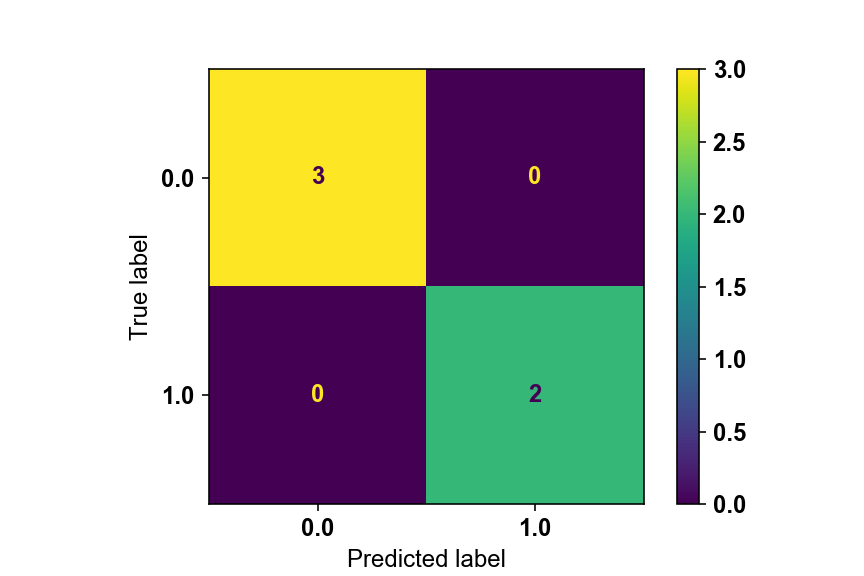

In [14]:
plot_confusion_matrix(svc_FSS,train_smpl,cls)
# clear separation

In [15]:
# calculating DPDs

DPD_vals = pd.DataFrame(np.zeros(len(total_wide.index)),index=total_wide.index,columns = ['DPD_FSS'])
for smpl in DPD_vals.index:
    DPD_vals.at[smpl,"DPD_FSS"] = b_coeff_FSS + np.dot(total_wide.loc[smpl],norm_vec_df['norm_vec_FSS'])

b_coeff_FSS = svc_FSS.intercept_[0]/linalg.norm(svc_FSS.coef_[0]) - DPD_vals.loc[['PSS_vs_STAT','CTL_PSS_vs_CTL_STAT'],'DPD_FSS'].mean()

for smpl in DPD_vals.index:
    DPD_vals.at[smpl,"DPD_FSS"] = b_coeff_FSS + np.dot(total_wide.loc[smpl],norm_vec_df['norm_vec_FSS'])


#DPD_vals.sort_values(by='DPD',ascending=False).to_csv('DPD_vals.csv')
DPD_vals.sort_values(by='DPD_FSS')

,DPD_FSS
Ntsilow_vs_STAT,-53.118198
LSS_vs_STAT,-53.085964
NoTzLS_vs_STAT,-53.084750
Ezsilow_vs_STAT,-42.767726
Plus_TzLS_vs_STAT,-33.534576
Suzsilow_vs_STAT,-33.377138
siCDK2_PSS_vs_CTL_STAT,-9.225547
siCDK2_STAT_vs_CTL_STAT,-8.744987
EzsiSt_vs_STAT,-7.364039
STAT_vs_STAT,-6.836601


In [16]:
# remodelling DPD

In [17]:
# preparing training sets
noremod_lbls = ['PSS_vs_STAT','CTL_PSS_vs_CTL_STAT']
#remod_lbls = ['HSS_vs_STAT','LSS_vs_STAT','OSS_vs_STAT','NoTzLS_vs_STAT','Ntsilow_vs_STAT']
remod_lbls = ['HSS_vs_STAT','UntHSS_vs_UntOSS','LSS_vs_STAT','NoTzLS_vs_STAT','Ntsilow_vs_STAT']

noremod_smpl = total_wide.loc[noremod_lbls]
remod_smpl = total_wide.loc[remod_lbls]


train_smpl = pd.concat([noremod_smpl,remod_smpl],axis=0)
cls = list(np.zeros(len(noremod_smpl.index))) + list(np.ones(len(remod_smpl.index)))

display(train_smpl)
display(cls)

Symbol,A1BG,A1BG-AS1,A2M,A2M-AS1,A4GALT,AAAS,AAAS_1,AACS,AADAC,AADACP1,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZYX_1,ZZEF1,ZZZ3
PSS_vs_STAT,0.0,0.0,0.000000,-2.130666,0.000000,-0.958575,-0.983210,0.000000,2.501492,1.148968,...,-1.114237,0.000000,0.000000,0.815359,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
CTL_PSS_vs_CTL_STAT,0.0,0.0,0.000000,-1.321978,0.000000,-0.426488,-0.729360,-0.408361,2.635887,0.000000,...,0.000000,-0.325294,0.303927,0.836621,0.0,-0.497239,0.800973,0.759847,0.000000,0.000000
HSS_vs_STAT,0.0,0.0,1.002831,-1.270739,0.000000,-0.621394,-0.754382,0.000000,0.000000,0.000000,...,0.681756,-0.717565,0.000000,0.994218,0.0,0.000000,1.174678,1.242858,0.806451,0.000000
UntHSS_vs_UntOSS,0.0,0.0,0.910074,0.000000,0.000000,-0.595465,0.000000,-0.246961,0.000000,0.000000,...,-1.323144,-0.528321,-0.380995,0.000000,0.0,0.000000,0.629960,0.684052,0.000000,-0.298329
LSS_vs_STAT,0.0,0.0,-0.821225,0.000000,-0.603028,-1.071432,-1.024142,-0.417962,0.000000,0.000000,...,-0.877941,0.000000,0.000000,0.999536,0.0,0.000000,0.923735,0.960641,0.586130,0.000000
NoTzLS_vs_STAT,0.0,0.0,0.774399,-1.374863,-1.057965,-0.471491,-0.688529,-0.366281,0.000000,0.945570,...,0.400081,0.000000,0.505315,0.691086,0.0,-0.244784,0.621419,0.550946,0.561672,-0.229899
Ntsilow_vs_STAT,0.0,0.0,0.000000,0.000000,-0.740619,-0.350265,0.000000,-0.321615,0.000000,0.845001,...,0.000000,0.000000,0.000000,0.535042,0.0,0.000000,0.836232,0.833882,0.474604,-0.397460


[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [18]:
# SVM classifier and STV
svc_remod = SVC(kernel='linear')
svc_remod.fit(train_smpl,cls)
b_coeff_remod = svc_remod.intercept_[0]/linalg.norm(svc_remod.coef_[0])
norm_vec_remod = svc_remod.coef_[0]/linalg.norm(svc_remod.coef_[0])

norm_vec_df['norm_vec_remod']=norm_vec_remod
norm_vec_df.sort_values(by='norm_vec_remod',ascending=False).to_csv('STVs_SVM.csv')

norm_vec_df.sort_values(by='norm_vec_remod',ascending=False)

,norm_vec_FSS,norm_vec_remod
Symbol,,
NGFR,0.009785,0.079293
FGF13,-0.012753,0.053193
LOC105373950,0.000000,0.052658
E2F2_1,0.030433,0.050048
TMPRSS13,0.000000,0.049761
LOC107987180,-0.004274,0.049493
TRNL2,0.028034,0.048364
ACTC1,0.017511,0.046145
LOC107986819,0.023419,0.044531


<IPython.core.display.Javascript object>


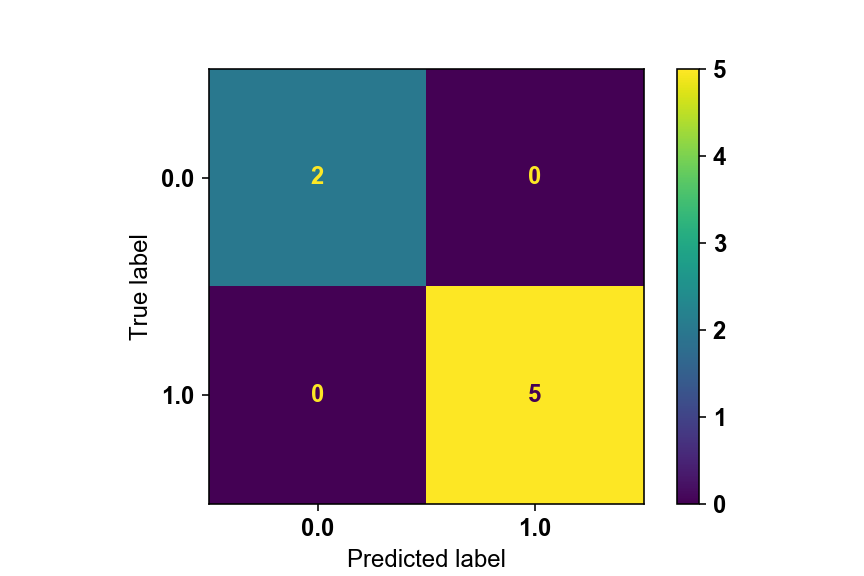

In [19]:
plot_confusion_matrix(svc_remod,train_smpl,cls)
# clear separation

In [20]:
# calculating DPDs

DPD_vals['DPD_remod']=np.nan
for smpl in DPD_vals.index:
    DPD_vals.at[smpl,"DPD_remod"] = b_coeff_remod + np.dot(total_wide.loc[smpl],norm_vec_df['norm_vec_remod'])


#DPD_vals.sort_values(by='DPD',ascending=False).to_csv('DPD_vals.csv')
DPD_vals.sort_values(by='DPD_remod')

,DPD_FSS,DPD_remod
PSS_vs_STAT,2.919328,-37.975547
CTL_PSS_vs_CTL_STAT,-2.919328,-37.972430
siCDK2_PSS_vs_CTL_STAT,-9.225547,-0.049780
STAT_vs_STAT,-6.836601,6.787546
sg_vs_wt,-4.817843,7.047368
siCDK2_STAT_vs_CTL_STAT,-8.744987,7.482714
Plus_TzSt_vs_STAT,-5.825343,8.522711
si_vs_wt,-5.601625,8.752109
EzsiSt_vs_STAT,-7.364039,9.135692
SuzsiSt_vs_STAT,-6.181209,10.352744


In [21]:
# oscillatory FSS

In [22]:
# preparing training sets
OSS_lbls = ['OSS_vs_STAT']
PSS_lbls = ['PSS_vs_STAT','CTL_PSS_vs_CTL_STAT','HSS_vs_STAT','UntHSS_vs_UntOSS','LSS_vs_STAT','NoTzLS_vs_STAT','Ntsilow_vs_STAT']
#PSS_lbls = ['HSS_vs_STAT','LSS_vs_STAT','NoTzLS_vs_STAT','Ntsilow_vs_STAT']

OSS_smpl = total_wide.loc[OSS_lbls]
PSS_smpl = total_wide.loc[PSS_lbls]


train_smpl = pd.concat([PSS_smpl,OSS_smpl],axis=0)
cls = list(np.zeros(len(PSS_smpl.index))) + list(np.ones(len(OSS_smpl.index)))

display(train_smpl)
display(cls)

Symbol,A1BG,A1BG-AS1,A2M,A2M-AS1,A4GALT,AAAS,AAAS_1,AACS,AADAC,AADACP1,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZYX_1,ZZEF1,ZZZ3
PSS_vs_STAT,0.0,0.0,0.000000,-2.130666,0.000000,-0.958575,-0.983210,0.000000,2.501492,1.148968,...,-1.114237,0.000000,0.000000,0.815359,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
CTL_PSS_vs_CTL_STAT,0.0,0.0,0.000000,-1.321978,0.000000,-0.426488,-0.729360,-0.408361,2.635887,0.000000,...,0.000000,-0.325294,0.303927,0.836621,0.0,-0.497239,0.800973,0.759847,0.000000,0.000000
HSS_vs_STAT,0.0,0.0,1.002831,-1.270739,0.000000,-0.621394,-0.754382,0.000000,0.000000,0.000000,...,0.681756,-0.717565,0.000000,0.994218,0.0,0.000000,1.174678,1.242858,0.806451,0.000000
UntHSS_vs_UntOSS,0.0,0.0,0.910074,0.000000,0.000000,-0.595465,0.000000,-0.246961,0.000000,0.000000,...,-1.323144,-0.528321,-0.380995,0.000000,0.0,0.000000,0.629960,0.684052,0.000000,-0.298329
LSS_vs_STAT,0.0,0.0,-0.821225,0.000000,-0.603028,-1.071432,-1.024142,-0.417962,0.000000,0.000000,...,-0.877941,0.000000,0.000000,0.999536,0.0,0.000000,0.923735,0.960641,0.586130,0.000000
NoTzLS_vs_STAT,0.0,0.0,0.774399,-1.374863,-1.057965,-0.471491,-0.688529,-0.366281,0.000000,0.945570,...,0.400081,0.000000,0.505315,0.691086,0.0,-0.244784,0.621419,0.550946,0.561672,-0.229899
Ntsilow_vs_STAT,0.0,0.0,0.000000,0.000000,-0.740619,-0.350265,0.000000,-0.321615,0.000000,0.845001,...,0.000000,0.000000,0.000000,0.535042,0.0,0.000000,0.836232,0.833882,0.474604,-0.397460
OSS_vs_STAT,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.629960,0.684052,0.000000,0.000000


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]

In [23]:
# SVM classifier and STV
svc_OSS = SVC(kernel='linear')
svc_OSS.fit(train_smpl,cls)
b_coeff_OSS = svc_OSS.intercept_[0]/linalg.norm(svc_OSS.coef_[0])
norm_vec_OSS = svc_OSS.coef_[0]/linalg.norm(svc_OSS.coef_[0])

norm_vec_df['norm_vec_OSS']=norm_vec_OSS
norm_vec_df.sort_values(by='norm_vec_OSS',ascending=False).to_csv('STVs_SVM.csv')

norm_vec_df.sort_values(by='norm_vec_OSS',ascending=False)

,norm_vec_FSS,norm_vec_remod,norm_vec_OSS
Symbol,,,
GALNT15,0.008952,0.005866,0.050611
KIT,0.023923,-0.012679,0.049039
LOC124905430,0.033809,-0.031577,0.046593
LINC02880,0.047068,0.024176,0.043195
HTR1B,0.007638,0.003227,0.039258
LOC105373585,0.014546,0.007221,0.038971
LINC01354,0.036020,0.008444,0.037900
INHBB,0.021118,0.004557,0.037151
LINC00632,-0.012673,-0.009611,0.036186


<IPython.core.display.Javascript object>


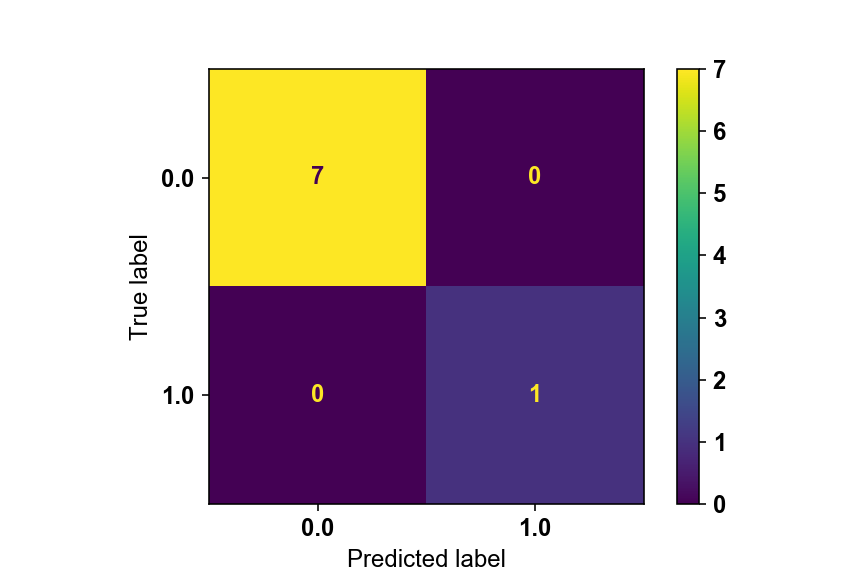

In [24]:
plot_confusion_matrix(svc_OSS,train_smpl,cls)
# clear separation

In [25]:
# calculating DPDs

DPD_vals['DPD_OSS']=np.nan
for smpl in DPD_vals.index:
    DPD_vals.at[smpl,"DPD_OSS"] = b_coeff_OSS + np.dot(total_wide.loc[smpl],norm_vec_df['norm_vec_OSS'])


#DPD_vals.sort_values(by='DPD',ascending=False).to_csv('DPD_vals.csv')
DPD_vals.index.name='Condition'
DPD_vals.to_csv('DPD_vals.csv')
DPD_vals.sort_values(by='DPD_OSS')


,DPD_FSS,DPD_remod,DPD_OSS
Condition,,,
HSS_vs_STAT,56.358446,37.975975,-51.131586
CTL_PSS_vs_CTL_STAT,-2.919328,-37.972430,-42.596030
Suzsilow_vs_STAT,-33.377138,27.814765,-41.314944
Plus_TzLS_vs_STAT,-33.534576,17.186495,-40.987940
LSS_vs_STAT,-53.085964,37.960344,-39.200228
PSS_vs_STAT,2.919328,-37.975547,-39.198805
NoTzLS_vs_STAT,-53.084750,37.965682,-39.192629
UntHSS_vs_UntOSS,56.358453,37.993173,-39.186554
Ntsilow_vs_STAT,-53.118198,37.967754,-39.186546


In [26]:
DPD_vals.sort_values(by='DPD_remod')

,DPD_FSS,DPD_remod,DPD_OSS
Condition,,,
PSS_vs_STAT,2.919328,-37.975547,-39.198805
CTL_PSS_vs_CTL_STAT,-2.919328,-37.972430,-42.596030
siCDK2_PSS_vs_CTL_STAT,-9.225547,-0.049780,1.272363
STAT_vs_STAT,-6.836601,6.787546,34.383876
sg_vs_wt,-4.817843,7.047368,21.145922
siCDK2_STAT_vs_CTL_STAT,-8.744987,7.482714,35.165346
Plus_TzSt_vs_STAT,-5.825343,8.522711,28.461811
si_vs_wt,-5.601625,8.752109,36.657086
EzsiSt_vs_STAT,-7.364039,9.135692,33.919281


In [27]:
angle_FSS_OSS = (np.arccos(np.dot(norm_vec_df['norm_vec_FSS'],norm_vec_df['norm_vec_OSS']))/np.pi)*180
print(angle_FSS_OSS)

angle_remod_OSS = (np.arccos(np.dot(norm_vec_df['norm_vec_remod'],norm_vec_df['norm_vec_OSS']))/np.pi)*180
print(angle_remod_OSS)

angle_FSS_remod = (np.arccos(np.dot(norm_vec_df['norm_vec_FSS'],norm_vec_df['norm_vec_remod']))/np.pi)*180
print(angle_FSS_remod)


93.59166934715076
91.03504431043275
89.98961422319985


In [28]:
display(DPD_vals.index)
print(len(DPD_vals.index))

Index(['CTL_PSS_vs_CTL_STAT', 'EzsiSt_vs_STAT', 'Ezsilow_vs_STAT',
       'HSS_vs_STAT', 'LSS_vs_STAT', 'NoTzLS_vs_STAT', 'Ntsilow_vs_STAT',
       'OSS_vs_STAT', 'PSS_vs_STAT', 'Plus_TzLS_vs_STAT', 'Plus_TzSt_vs_STAT',
       'SuzsiSt_vs_STAT', 'Suzsilow_vs_STAT', 'TzHSS_vs_UntOSS',
       'TzOSS_vs_UntOSS', 'UntHSS_vs_UntOSS', 'sg_vs_wt',
       'siCDK2_PSS_vs_CTL_STAT', 'siCDK2_STAT_vs_CTL_STAT', 'si_vs_wt',
       'STAT_vs_STAT'],
      dtype='object', name='Condition')

21


<IPython.core.display.Javascript object>


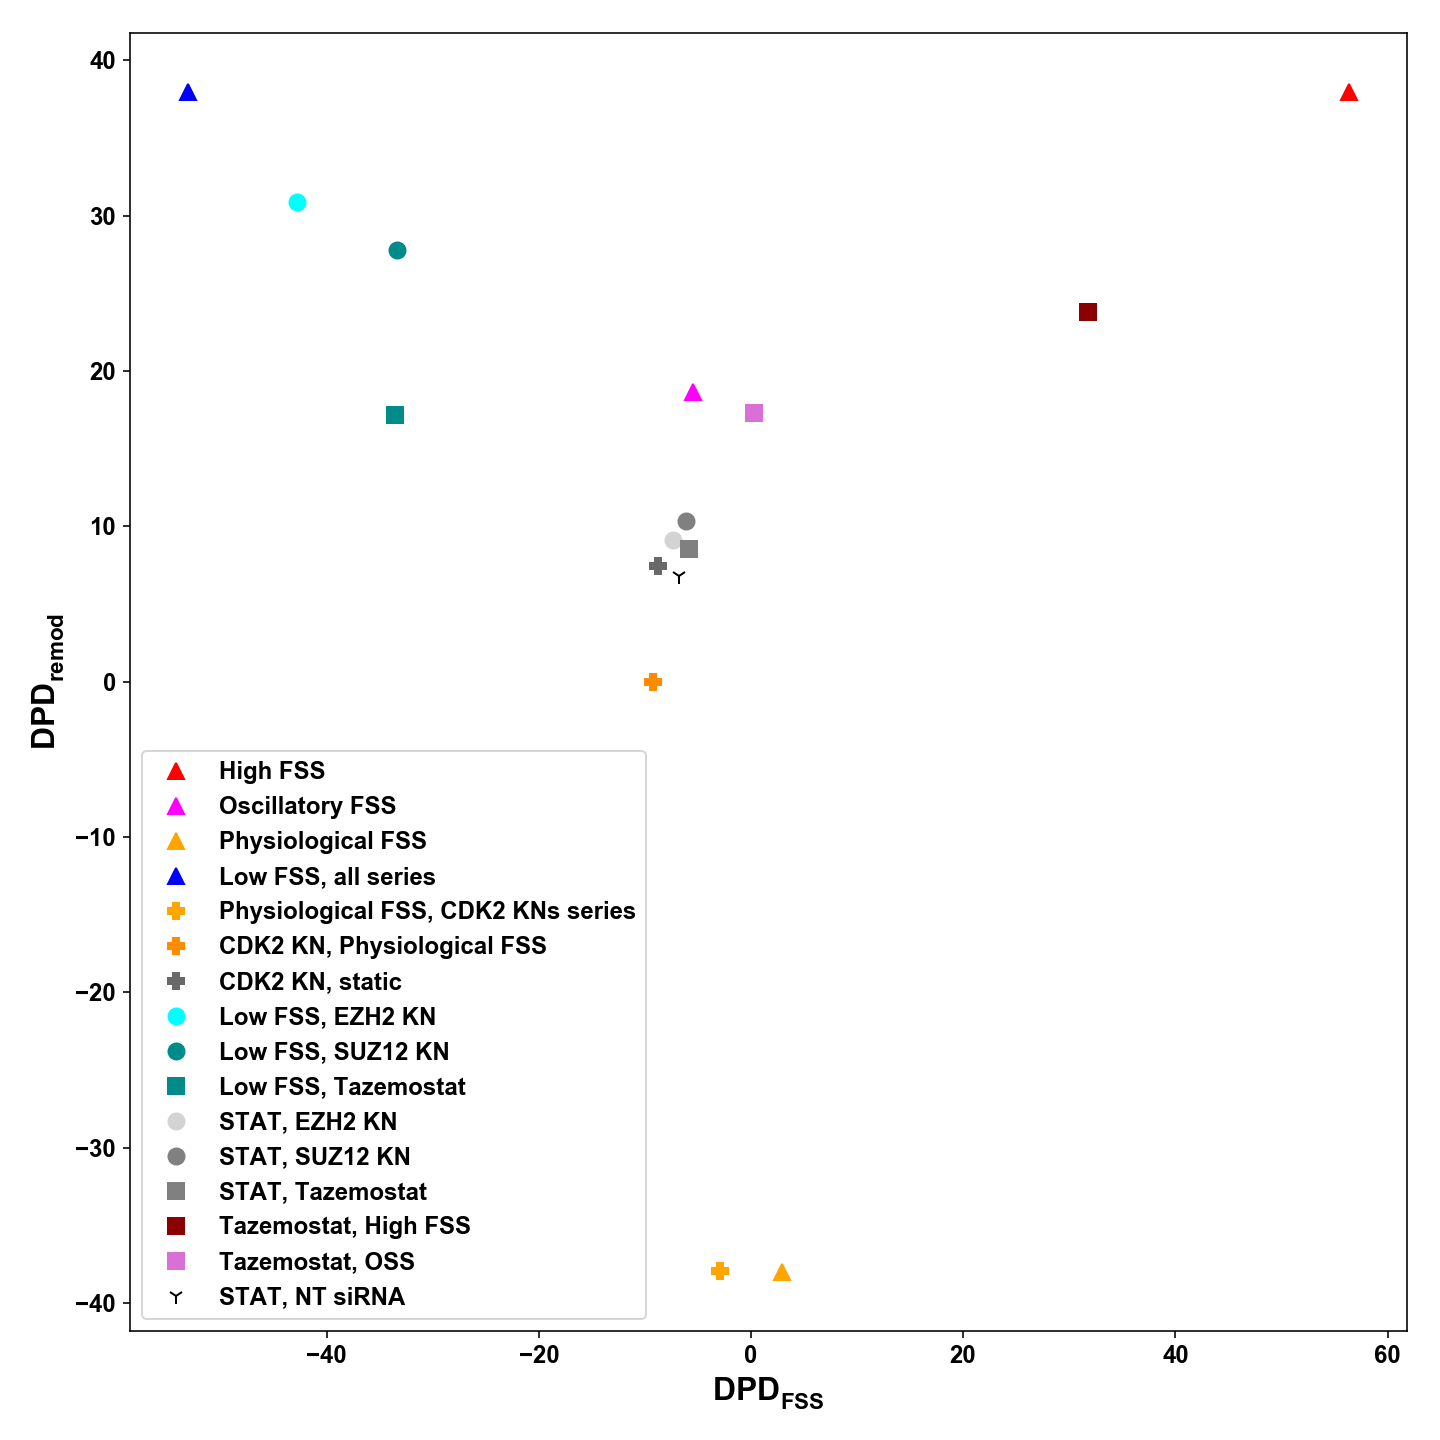

In [29]:
# 2D DPD visualization


fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

#plt.suptitle('PhosphoSite fold changes',**fontTitle)

xc = 0
yc = 1

ax.plot([DPD_vals.loc['HSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['HSS_vs_STAT'].iloc[yc]],'^',color='red',label='High FSS',ms=8)
ax.plot([DPD_vals.loc['OSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['OSS_vs_STAT'].iloc[yc]],'^',color='magenta',label='Oscillatory FSS',ms=8)
ax.plot([DPD_vals.loc['PSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['PSS_vs_STAT'].iloc[yc]],'^',color='orange',label='Physiological FSS',ms=8)
ax.plot([DPD_vals.loc['LSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['LSS_vs_STAT'].iloc[yc]],'^',color='blue',label='Low FSS, all series',ms=8)

# CDK2 KNs
ax.plot([DPD_vals.loc['CTL_PSS_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['CTL_PSS_vs_CTL_STAT'].iloc[yc]],'P',color='orange',label='Physiological FSS, CDK2 KNs series',ms=8)
ax.plot([DPD_vals.loc['siCDK2_PSS_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['siCDK2_PSS_vs_CTL_STAT'].iloc[yc]],'P',color='darkorange',label='CDK2 KN, Physiological FSS',ms=8)
ax.plot([DPD_vals.loc['siCDK2_STAT_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['siCDK2_STAT_vs_CTL_STAT'].iloc[yc]],'P',color='dimgrey',label='CDK2 KN, static',ms=8)

#ax.plot([DPD_vals.loc['Ntsilow_vs_STAT'].iloc[xc]],[DPD_vals.loc['Ntsilow_vs_STAT'].iloc[yc]],'o',color='navy',label='Low FSS, PRC2 KN series',ms=8)
ax.plot([DPD_vals.loc['Ezsilow_vs_STAT'].iloc[xc]],[DPD_vals.loc['Ezsilow_vs_STAT'].iloc[yc]],'o',color='cyan',label='Low FSS, EZH2 KN',ms=8)
ax.plot([DPD_vals.loc['Suzsilow_vs_STAT'].iloc[xc]],[DPD_vals.loc['Suzsilow_vs_STAT'].iloc[yc]],'o',color='darkcyan',label='Low FSS, SUZ12 KN',ms=8)
#ax.plot([DPD_vals.loc['NoTzLS_vs_STAT'].iloc[xc]],[DPD_vals.loc['NoTzLS_vs_STAT'].iloc[yc]],'s',color='navy',label='Low FSS, Tazemostat series',ms=8)
ax.plot([DPD_vals.loc['Plus_TzLS_vs_STAT'].iloc[xc]],[DPD_vals.loc['Plus_TzLS_vs_STAT'].iloc[yc]],'s',color='darkcyan',label='Low FSS, Tazemostat',ms=8)

ax.plot([DPD_vals.loc['EzsiSt_vs_STAT'].iloc[xc]],[DPD_vals.loc['EzsiSt_vs_STAT'].iloc[yc]],'o',color='lightgrey',label='STAT, EZH2 KN',ms=8)
ax.plot([DPD_vals.loc['SuzsiSt_vs_STAT'].iloc[xc]],[DPD_vals.loc['SuzsiSt_vs_STAT'].iloc[yc]],'o',color='grey',label='STAT, SUZ12 KN',ms=8)
ax.plot([DPD_vals.loc['Plus_TzSt_vs_STAT'].iloc[xc]],[DPD_vals.loc['Plus_TzSt_vs_STAT'].iloc[yc]],'s',color='grey',label='STAT, Tazemostat',ms=8)

ax.plot([DPD_vals.loc['TzHSS_vs_UntOSS'].iloc[xc]],[DPD_vals.loc['TzHSS_vs_UntOSS'].iloc[yc]],'s',color='darkred',label='Tazemostat, High FSS',ms=8)
ax.plot([DPD_vals.loc['TzOSS_vs_UntOSS'].iloc[xc]],[DPD_vals.loc['TzOSS_vs_UntOSS'].iloc[yc]],'s',color='orchid',label='Tazemostat, OSS',ms=8)
#ax.plot([DPD_vals.loc['UntHSS_vs_UntOSS'].iloc[xc]],[DPD_vals.loc['UntHSS_vs_UntOSS'].iloc[yc]],'s',color='firebrick',label='High FSS, Tazemostat series',ms=8)


ax.plot([DPD_vals.loc['STAT_vs_STAT'].iloc[xc]],[DPD_vals.loc['STAT_vs_STAT'].iloc[yc]],'1',color='black',label='STAT, NT siRNA',ms=8)
#ax.plot([DPD_vals.loc['si_vs_wt'].iloc[xc]],[DPD_vals.loc['si_vs_wt'].iloc[yc]],'P',color='lightgrey',label='STAT, NT siRNA',ms=8)
#ax.plot([DPD_vals.loc['sg_vs_wt'].iloc[xc]],[DPD_vals.loc['sg_vs_wt'].iloc[yc]],'P',color='grey',label='STAT, NT sgRNA',ms=8)



#for smpl in drugs12pert.index:
#    ax.annotate(RPPA_legend.loc[smpl]['Sample Description (drug abbre. | dose or time-point)'],(PCA_TPM.loc[smpl][xc],PCA_TPM.loc[smpl][yc]))

ax.set_xlabel('$\mathregular{DPD_{FSS}}$',**fontLabel)
ax.set_ylabel('$\mathregular{DPD_{remod}}$',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.tight_layout()
plt.show()



<IPython.core.display.Javascript object>


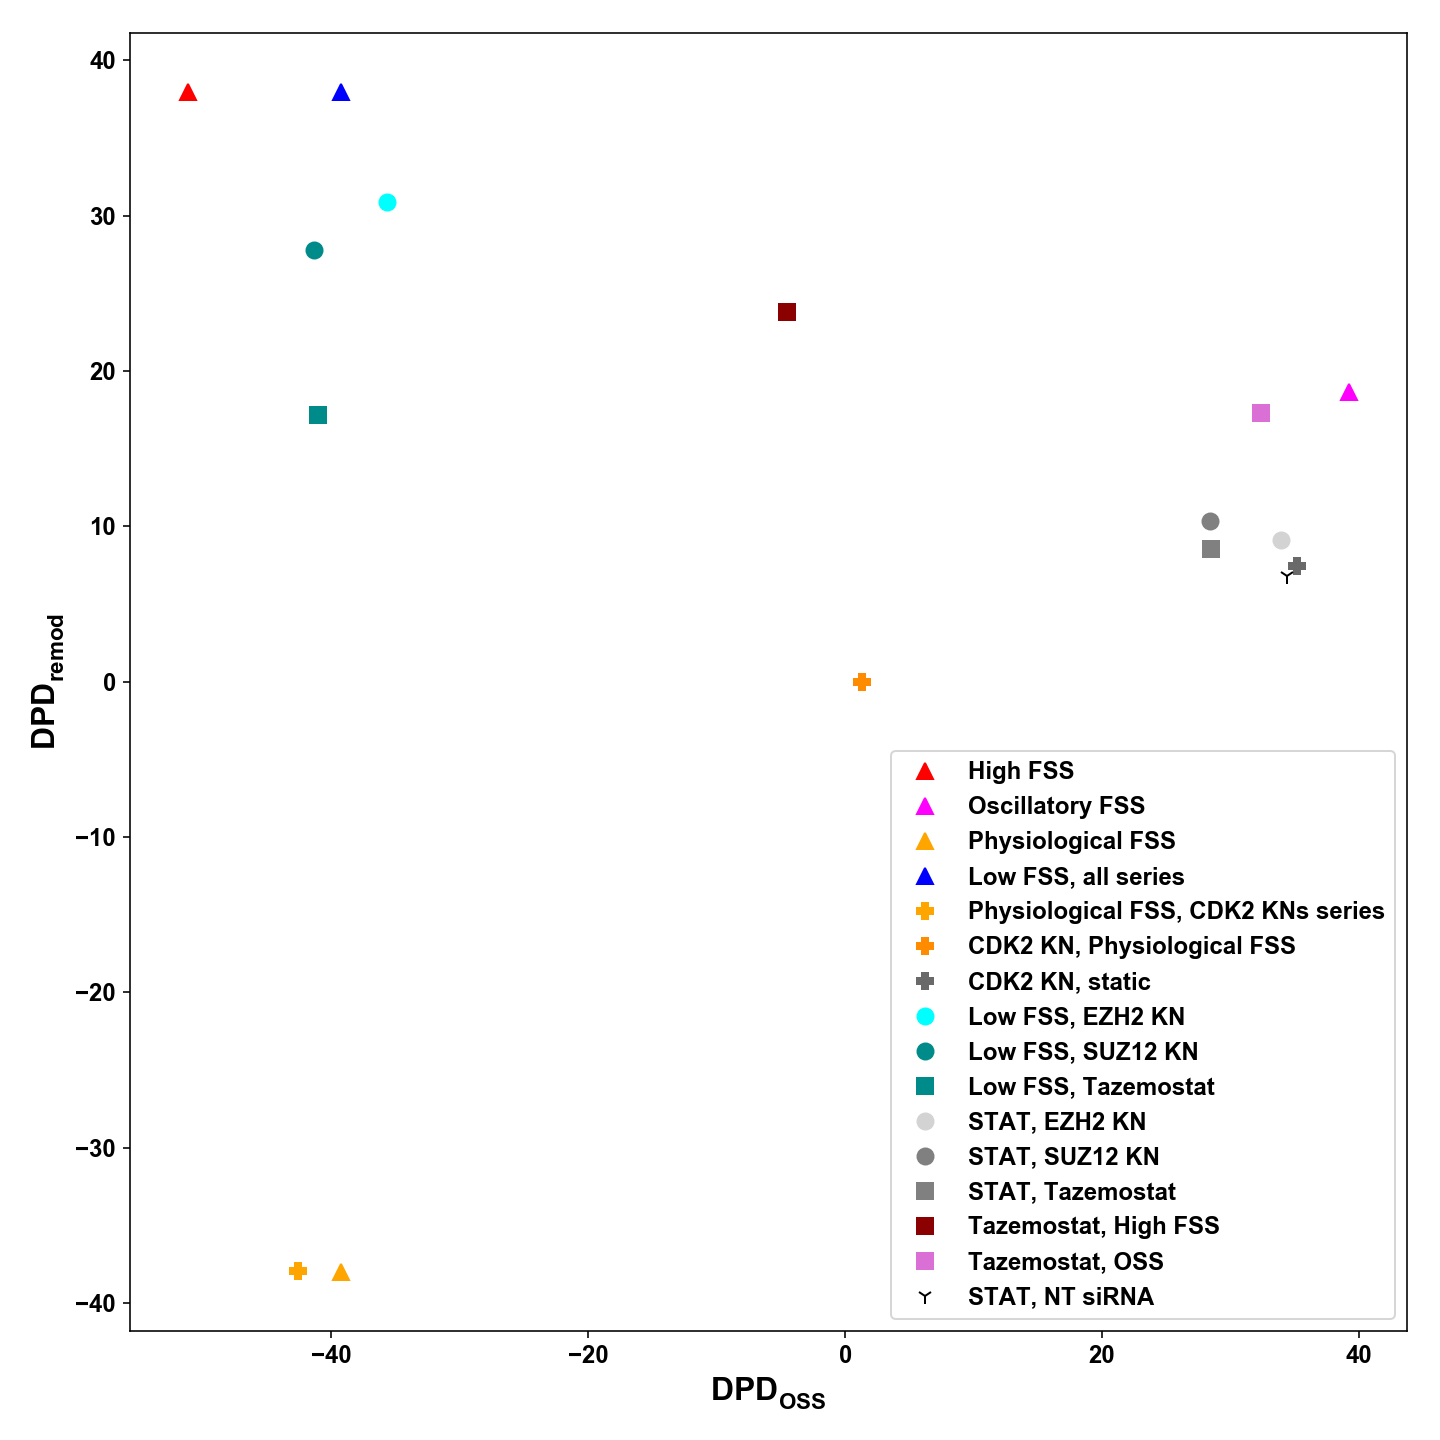

In [30]:
# 2D DPD visualization


fig = plt.figure(figsize=(10,10))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

#plt.suptitle('PhosphoSite fold changes',**fontTitle)

xc = 2
yc = 1

ax.plot([DPD_vals.loc['HSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['HSS_vs_STAT'].iloc[yc]],'^',color='red',label='High FSS',ms=8)
ax.plot([DPD_vals.loc['OSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['OSS_vs_STAT'].iloc[yc]],'^',color='magenta',label='Oscillatory FSS',ms=8)
ax.plot([DPD_vals.loc['PSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['PSS_vs_STAT'].iloc[yc]],'^',color='orange',label='Physiological FSS',ms=8)
ax.plot([DPD_vals.loc['LSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['LSS_vs_STAT'].iloc[yc]],'^',color='blue',label='Low FSS, all series',ms=8)

# CDK2 KNs
ax.plot([DPD_vals.loc['CTL_PSS_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['CTL_PSS_vs_CTL_STAT'].iloc[yc]],'P',color='orange',label='Physiological FSS, CDK2 KNs series',ms=8)
ax.plot([DPD_vals.loc['siCDK2_PSS_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['siCDK2_PSS_vs_CTL_STAT'].iloc[yc]],'P',color='darkorange',label='CDK2 KN, Physiological FSS',ms=8)
ax.plot([DPD_vals.loc['siCDK2_STAT_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['siCDK2_STAT_vs_CTL_STAT'].iloc[yc]],'P',color='dimgrey',label='CDK2 KN, static',ms=8)

#ax.plot([DPD_vals.loc['Ntsilow_vs_STAT'].iloc[xc]],[DPD_vals.loc['Ntsilow_vs_STAT'].iloc[yc]],'o',color='navy',label='Low FSS, PRC2 KN series',ms=8)
ax.plot([DPD_vals.loc['Ezsilow_vs_STAT'].iloc[xc]],[DPD_vals.loc['Ezsilow_vs_STAT'].iloc[yc]],'o',color='cyan',label='Low FSS, EZH2 KN',ms=8)
ax.plot([DPD_vals.loc['Suzsilow_vs_STAT'].iloc[xc]],[DPD_vals.loc['Suzsilow_vs_STAT'].iloc[yc]],'o',color='darkcyan',label='Low FSS, SUZ12 KN',ms=8)
#ax.plot([DPD_vals.loc['NoTzLS_vs_STAT'].iloc[xc]],[DPD_vals.loc['NoTzLS_vs_STAT'].iloc[yc]],'s',color='navy',label='Low FSS, Tazemostat series',ms=8)
ax.plot([DPD_vals.loc['Plus_TzLS_vs_STAT'].iloc[xc]],[DPD_vals.loc['Plus_TzLS_vs_STAT'].iloc[yc]],'s',color='darkcyan',label='Low FSS, Tazemostat',ms=8)

ax.plot([DPD_vals.loc['EzsiSt_vs_STAT'].iloc[xc]],[DPD_vals.loc['EzsiSt_vs_STAT'].iloc[yc]],'o',color='lightgrey',label='STAT, EZH2 KN',ms=8)
ax.plot([DPD_vals.loc['SuzsiSt_vs_STAT'].iloc[xc]],[DPD_vals.loc['SuzsiSt_vs_STAT'].iloc[yc]],'o',color='grey',label='STAT, SUZ12 KN',ms=8)
ax.plot([DPD_vals.loc['Plus_TzSt_vs_STAT'].iloc[xc]],[DPD_vals.loc['Plus_TzSt_vs_STAT'].iloc[yc]],'s',color='grey',label='STAT, Tazemostat',ms=8)

ax.plot([DPD_vals.loc['TzHSS_vs_UntOSS'].iloc[xc]],[DPD_vals.loc['TzHSS_vs_UntOSS'].iloc[yc]],'s',color='darkred',label='Tazemostat, High FSS',ms=8)
ax.plot([DPD_vals.loc['TzOSS_vs_UntOSS'].iloc[xc]],[DPD_vals.loc['TzOSS_vs_UntOSS'].iloc[yc]],'s',color='orchid',label='Tazemostat, OSS',ms=8)
#ax.plot([DPD_vals.loc['UntHSS_vs_UntOSS'].iloc[xc]],[DPD_vals.loc['UntHSS_vs_UntOSS'].iloc[yc]],'s',color='firebrick',label='High FSS, Tazemostat series',ms=8)


ax.plot([DPD_vals.loc['STAT_vs_STAT'].iloc[xc]],[DPD_vals.loc['STAT_vs_STAT'].iloc[yc]],'1',color='black',label='STAT, NT siRNA',ms=8)
#ax.plot([DPD_vals.loc['si_vs_wt'].iloc[xc]],[DPD_vals.loc['si_vs_wt'].iloc[yc]],'P',color='lightgrey',label='STAT, NT siRNA',ms=8)
#ax.plot([DPD_vals.loc['sg_vs_wt'].iloc[xc]],[DPD_vals.loc['sg_vs_wt'].iloc[yc]],'P',color='grey',label='STAT, NT sgRNA',ms=8)



#for smpl in drugs12pert.index:
#    ax.annotate(RPPA_legend.loc[smpl]['Sample Description (drug abbre. | dose or time-point)'],(PCA_TPM.loc[smpl][xc],PCA_TPM.loc[smpl][yc]))

ax.set_xlabel('$\mathregular{DPD_{OSS}}$',**fontLabel)
ax.set_ylabel('$\mathregular{DPD_{remod}}$',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.tight_layout()
plt.show()



<IPython.core.display.Javascript object>


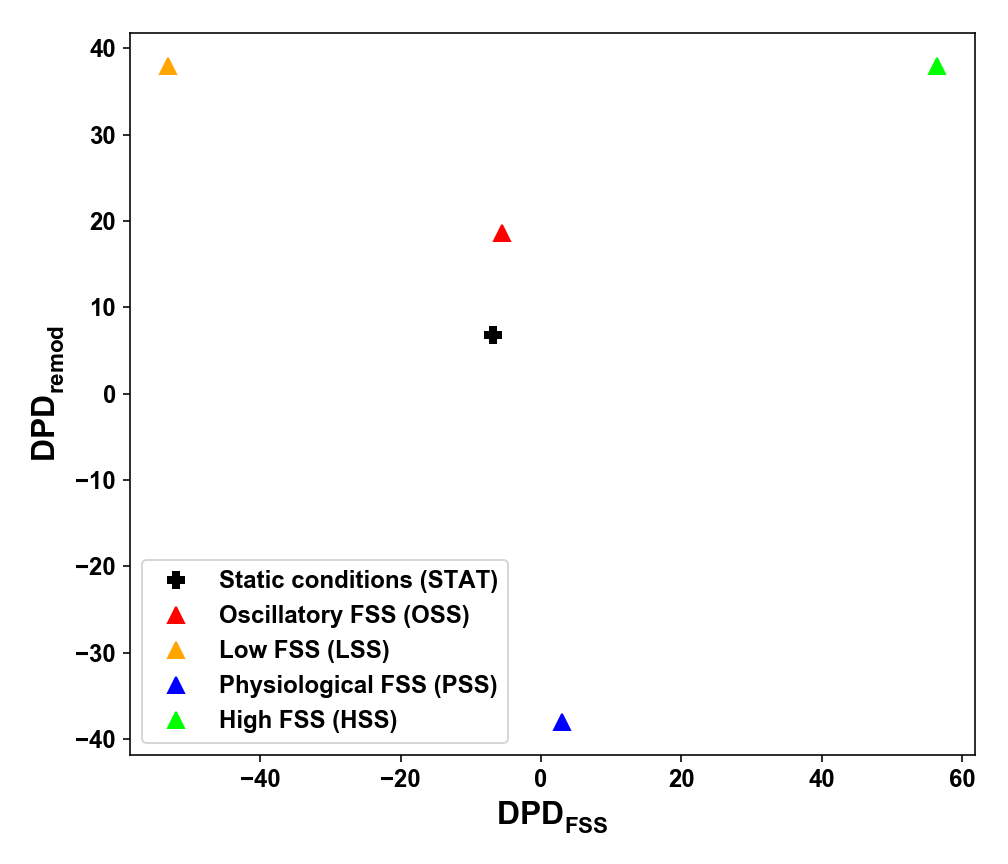

In [32]:
# 2D DPD visualization


fig = plt.figure(figsize=(7,6))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

#plt.suptitle('PhosphoSite fold changes',**fontTitle)

xc = 0
yc = 1

ax.plot([DPD_vals.loc['STAT_vs_STAT'].iloc[xc]],[DPD_vals.loc['STAT_vs_STAT'].iloc[yc]],'P',color='black',label='Static conditions (STAT)',ms=8)
ax.plot([DPD_vals.loc['OSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['OSS_vs_STAT'].iloc[yc]],'^',color='red',label='Oscillatory FSS (OSS)',ms=8)
ax.plot([DPD_vals.loc['LSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['LSS_vs_STAT'].iloc[yc]],'^',color='orange',label='Low FSS (LSS)',ms=8)
ax.plot([DPD_vals.loc['PSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['PSS_vs_STAT'].iloc[yc]],'^',color='blue',label='Physiological FSS (PSS)',ms=8)
ax.plot([DPD_vals.loc['HSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['HSS_vs_STAT'].iloc[yc]],'^',color='lime',label='High FSS (HSS)',ms=8)





#for smpl in drugs12pert.index:
#    ax.annotate(RPPA_legend.loc[smpl]['Sample Description (drug abbre. | dose or time-point)'],(PCA_TPM.loc[smpl][xc],PCA_TPM.loc[smpl][yc]))

ax.set_xlabel('$\mathregular{DPD_{FSS}}$',**fontLabel)
ax.set_ylabel('$\mathregular{DPD_{remod}}$',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.tight_layout()
plt.show()



<IPython.core.display.Javascript object>


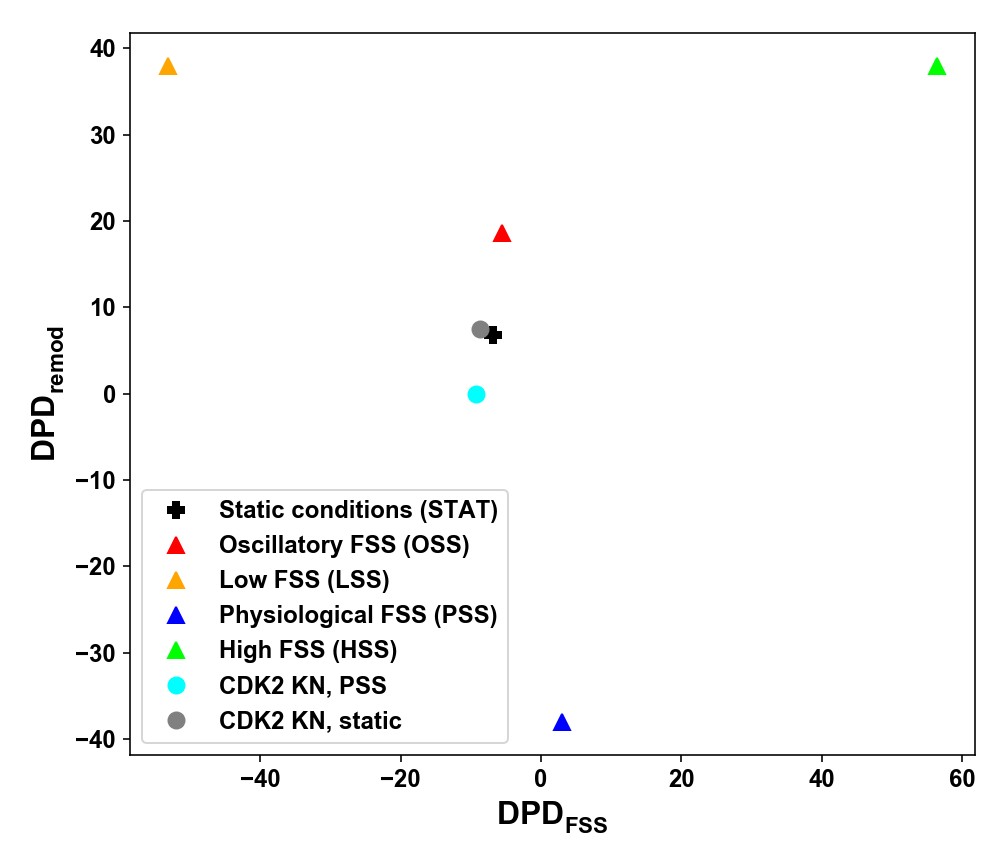

In [36]:
# 2D DPD visualization


fig = plt.figure(figsize=(7,6))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

#plt.suptitle('PhosphoSite fold changes',**fontTitle)

xc = 0
yc = 1

ax.plot([DPD_vals.loc['STAT_vs_STAT'].iloc[xc]],[DPD_vals.loc['STAT_vs_STAT'].iloc[yc]],'P',color='black',label='Static conditions (STAT)',ms=8)
ax.plot([DPD_vals.loc['OSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['OSS_vs_STAT'].iloc[yc]],'^',color='red',label='Oscillatory FSS (OSS)',ms=8)
ax.plot([DPD_vals.loc['LSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['LSS_vs_STAT'].iloc[yc]],'^',color='orange',label='Low FSS (LSS)',ms=8)
ax.plot([DPD_vals.loc['PSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['PSS_vs_STAT'].iloc[yc]],'^',color='blue',label='Physiological FSS (PSS)',ms=8)
ax.plot([DPD_vals.loc['HSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['HSS_vs_STAT'].iloc[yc]],'^',color='lime',label='High FSS (HSS)',ms=8)


# CDK2 KNs
#ax.plot([DPD_vals.loc['CTL_PSS_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['CTL_PSS_vs_CTL_STAT'].iloc[yc]],'o',color='blue',label='PSS, CDK2 KNs series',ms=8)
ax.plot([DPD_vals.loc['siCDK2_PSS_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['siCDK2_PSS_vs_CTL_STAT'].iloc[yc]],'o',color='cyan',label='CDK2 KN, PSS',ms=8)
ax.plot([DPD_vals.loc['siCDK2_STAT_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['siCDK2_STAT_vs_CTL_STAT'].iloc[yc]],'o',color='grey',label='CDK2 KN, static',ms=8)



#for smpl in drugs12pert.index:
#    ax.annotate(RPPA_legend.loc[smpl]['Sample Description (drug abbre. | dose or time-point)'],(PCA_TPM.loc[smpl][xc],PCA_TPM.loc[smpl][yc]))

ax.set_xlabel('$\mathregular{DPD_{FSS}}$',**fontLabel)
ax.set_ylabel('$\mathregular{DPD_{remod}}$',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.tight_layout()
plt.show()



<IPython.core.display.Javascript object>


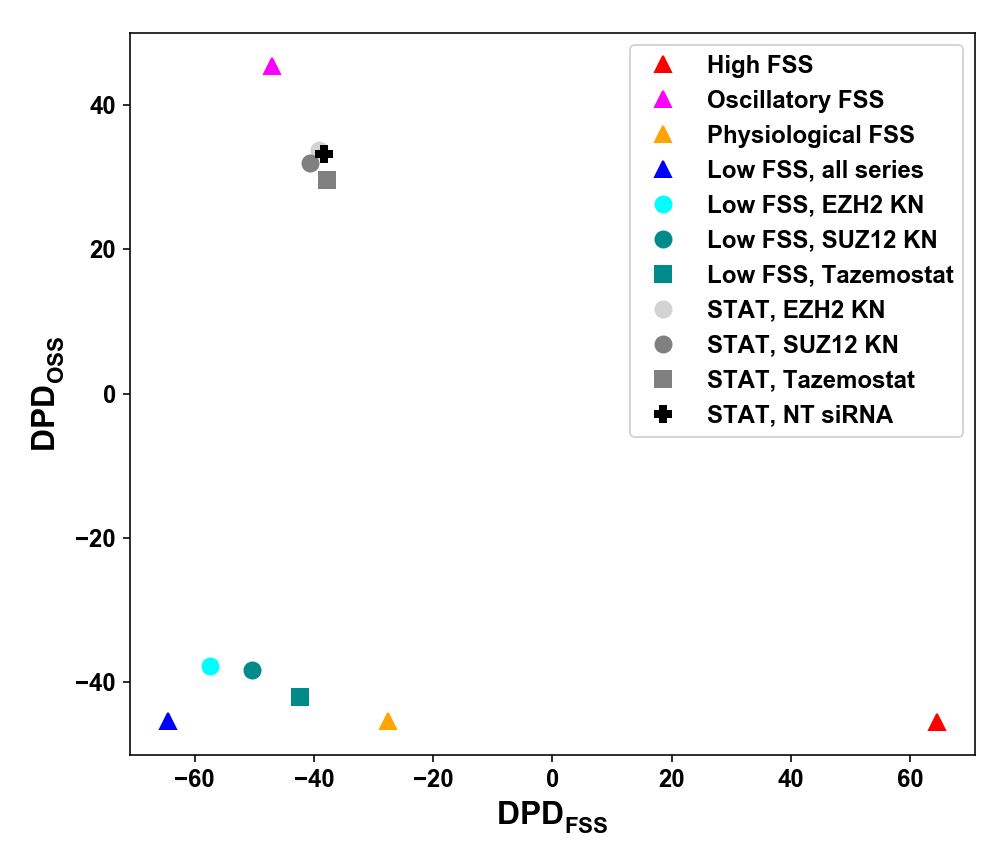

In [40]:
# 2D DPD visualization


fig = plt.figure(figsize=(7,6))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

#plt.suptitle('PhosphoSite fold changes',**fontTitle)

xc = 0
yc = 2

ax.plot([DPD_vals.loc['HSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['HSS_vs_STAT'].iloc[yc]],'^',color='red',label='High FSS',ms=8)
ax.plot([DPD_vals.loc['OSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['OSS_vs_STAT'].iloc[yc]],'^',color='magenta',label='Oscillatory FSS',ms=8)
ax.plot([DPD_vals.loc['PSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['PSS_vs_STAT'].iloc[yc]],'^',color='orange',label='Physiological FSS',ms=8)
ax.plot([DPD_vals.loc['LSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['LSS_vs_STAT'].iloc[yc]],'^',color='blue',label='Low FSS, all series',ms=8)

#ax.plot([DPD_vals.loc['Ntsilow_vs_STAT'].iloc[xc]],[DPD_vals.loc['Ntsilow_vs_STAT'].iloc[yc]],'o',color='navy',label='Low FSS, PRC2 KN series',ms=8)
ax.plot([DPD_vals.loc['Ezsilow_vs_STAT'].iloc[xc]],[DPD_vals.loc['Ezsilow_vs_STAT'].iloc[yc]],'o',color='cyan',label='Low FSS, EZH2 KN',ms=8)
ax.plot([DPD_vals.loc['Suzsilow_vs_STAT'].iloc[xc]],[DPD_vals.loc['Suzsilow_vs_STAT'].iloc[yc]],'o',color='darkcyan',label='Low FSS, SUZ12 KN',ms=8)
#ax.plot([DPD_vals.loc['NoTzLS_vs_STAT'].iloc[xc]],[DPD_vals.loc['NoTzLS_vs_STAT'].iloc[yc]],'s',color='navy',label='Low FSS, Tazemostat series',ms=8)
ax.plot([DPD_vals.loc['Plus_TzLS_vs_STAT'].iloc[xc]],[DPD_vals.loc['Plus_TzLS_vs_STAT'].iloc[yc]],'s',color='darkcyan',label='Low FSS, Tazemostat',ms=8)

ax.plot([DPD_vals.loc['EzsiSt_vs_STAT'].iloc[xc]],[DPD_vals.loc['EzsiSt_vs_STAT'].iloc[yc]],'o',color='lightgrey',label='STAT, EZH2 KN',ms=8)
ax.plot([DPD_vals.loc['SuzsiSt_vs_STAT'].iloc[xc]],[DPD_vals.loc['SuzsiSt_vs_STAT'].iloc[yc]],'o',color='grey',label='STAT, SUZ12 KN',ms=8)
ax.plot([DPD_vals.loc['Plus_TzSt_vs_STAT'].iloc[xc]],[DPD_vals.loc['Plus_TzSt_vs_STAT'].iloc[yc]],'s',color='grey',label='STAT, Tazemostat',ms=8)

ax.plot([DPD_vals.loc['STAT_vs_STAT'].iloc[xc]],[DPD_vals.loc['STAT_vs_STAT'].iloc[yc]],'P',color='black',label='STAT, NT siRNA',ms=8)
#ax.plot([DPD_vals.loc['si_vs_wt'].iloc[xc]],[DPD_vals.loc['si_vs_wt'].iloc[yc]],'P',color='lightgrey',label='STAT, NT siRNA',ms=8)
#ax.plot([DPD_vals.loc['sg_vs_wt'].iloc[xc]],[DPD_vals.loc['sg_vs_wt'].iloc[yc]],'P',color='grey',label='STAT, NT sgRNA',ms=8)



#for smpl in drugs12pert.index:
#    ax.annotate(RPPA_legend.loc[smpl]['Sample Description (drug abbre. | dose or time-point)'],(PCA_TPM.loc[smpl][0],PCA_TPM.loc[smpl][1]))

ax.set_xlabel('$\mathregular{DPD_{FSS}}$',**fontLabel)
ax.set_ylabel('$\mathregular{DPD_{OSS}}$',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.tight_layout()
plt.show()



<IPython.core.display.Javascript object>


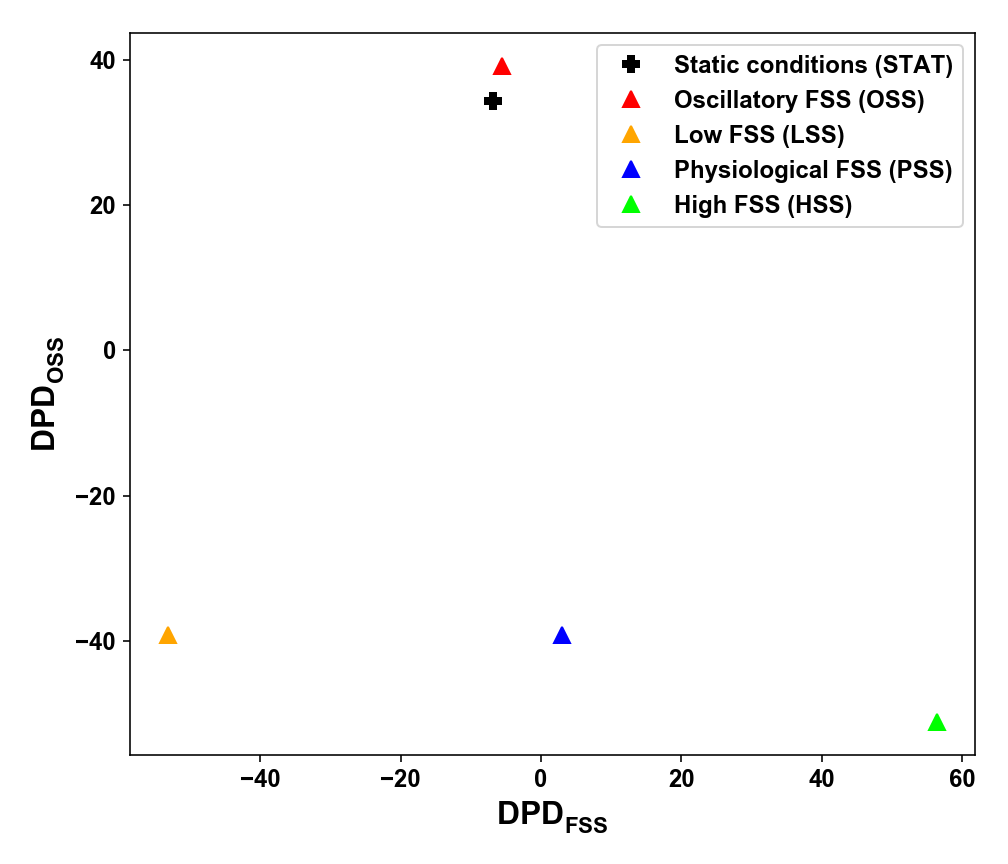

In [33]:
# 2D DPD visualization


fig = plt.figure(figsize=(7,6))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

#plt.suptitle('PhosphoSite fold changes',**fontTitle)

xc = 0
yc = 2


ax.plot([DPD_vals.loc['STAT_vs_STAT'].iloc[xc]],[DPD_vals.loc['STAT_vs_STAT'].iloc[yc]],'P',color='black',label='Static conditions (STAT)',ms=8)
ax.plot([DPD_vals.loc['OSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['OSS_vs_STAT'].iloc[yc]],'^',color='red',label='Oscillatory FSS (OSS)',ms=8)
ax.plot([DPD_vals.loc['LSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['LSS_vs_STAT'].iloc[yc]],'^',color='orange',label='Low FSS (LSS)',ms=8)
ax.plot([DPD_vals.loc['PSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['PSS_vs_STAT'].iloc[yc]],'^',color='blue',label='Physiological FSS (PSS)',ms=8)
ax.plot([DPD_vals.loc['HSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['HSS_vs_STAT'].iloc[yc]],'^',color='lime',label='High FSS (HSS)',ms=8)




#for smpl in drugs12pert.index:
#    ax.annotate(RPPA_legend.loc[smpl]['Sample Description (drug abbre. | dose or time-point)'],(PCA_TPM.loc[smpl][0],PCA_TPM.loc[smpl][1]))

ax.set_xlabel('$\mathregular{DPD_{FSS}}$',**fontLabel)
ax.set_ylabel('$\mathregular{DPD_{OSS}}$',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.tight_layout()
plt.show()



<IPython.core.display.Javascript object>


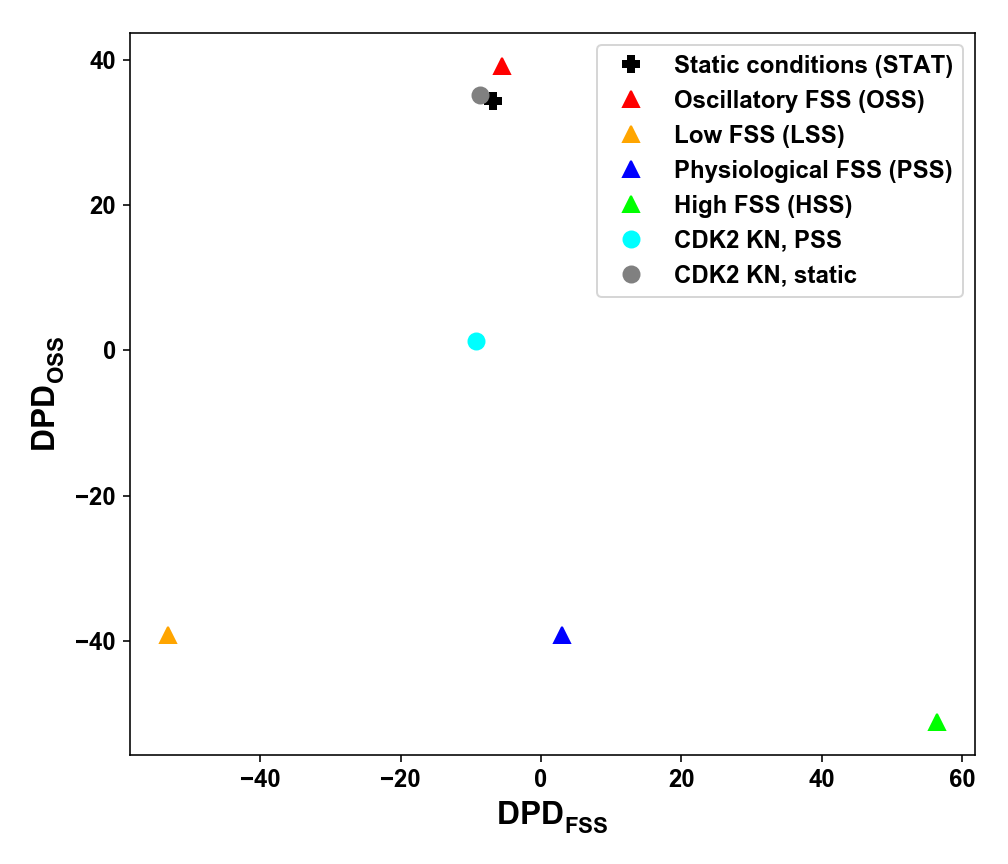

In [37]:
# 2D DPD visualization


fig = plt.figure(figsize=(7,6))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

#plt.suptitle('PhosphoSite fold changes',**fontTitle)

xc = 0
yc = 2


ax.plot([DPD_vals.loc['STAT_vs_STAT'].iloc[xc]],[DPD_vals.loc['STAT_vs_STAT'].iloc[yc]],'P',color='black',label='Static conditions (STAT)',ms=8)
ax.plot([DPD_vals.loc['OSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['OSS_vs_STAT'].iloc[yc]],'^',color='red',label='Oscillatory FSS (OSS)',ms=8)
ax.plot([DPD_vals.loc['LSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['LSS_vs_STAT'].iloc[yc]],'^',color='orange',label='Low FSS (LSS)',ms=8)
ax.plot([DPD_vals.loc['PSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['PSS_vs_STAT'].iloc[yc]],'^',color='blue',label='Physiological FSS (PSS)',ms=8)
ax.plot([DPD_vals.loc['HSS_vs_STAT'].iloc[xc]],[DPD_vals.loc['HSS_vs_STAT'].iloc[yc]],'^',color='lime',label='High FSS (HSS)',ms=8)


# CDK2 KNs
#ax.plot([DPD_vals.loc['CTL_PSS_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['CTL_PSS_vs_CTL_STAT'].iloc[yc]],'o',color='blue',label='PSS, CDK2 KNs series',ms=8)
ax.plot([DPD_vals.loc['siCDK2_PSS_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['siCDK2_PSS_vs_CTL_STAT'].iloc[yc]],'o',color='cyan',label='CDK2 KN, PSS',ms=8)
ax.plot([DPD_vals.loc['siCDK2_STAT_vs_CTL_STAT'].iloc[xc]],[DPD_vals.loc['siCDK2_STAT_vs_CTL_STAT'].iloc[yc]],'o',color='grey',label='CDK2 KN, static',ms=8)



#for smpl in drugs12pert.index:
#    ax.annotate(RPPA_legend.loc[smpl]['Sample Description (drug abbre. | dose or time-point)'],(PCA_TPM.loc[smpl][0],PCA_TPM.loc[smpl][1]))

ax.set_xlabel('$\mathregular{DPD_{FSS}}$',**fontLabel)
ax.set_ylabel('$\mathregular{DPD_{OSS}}$',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.tight_layout()
plt.show()



<IPython.core.display.Javascript object>


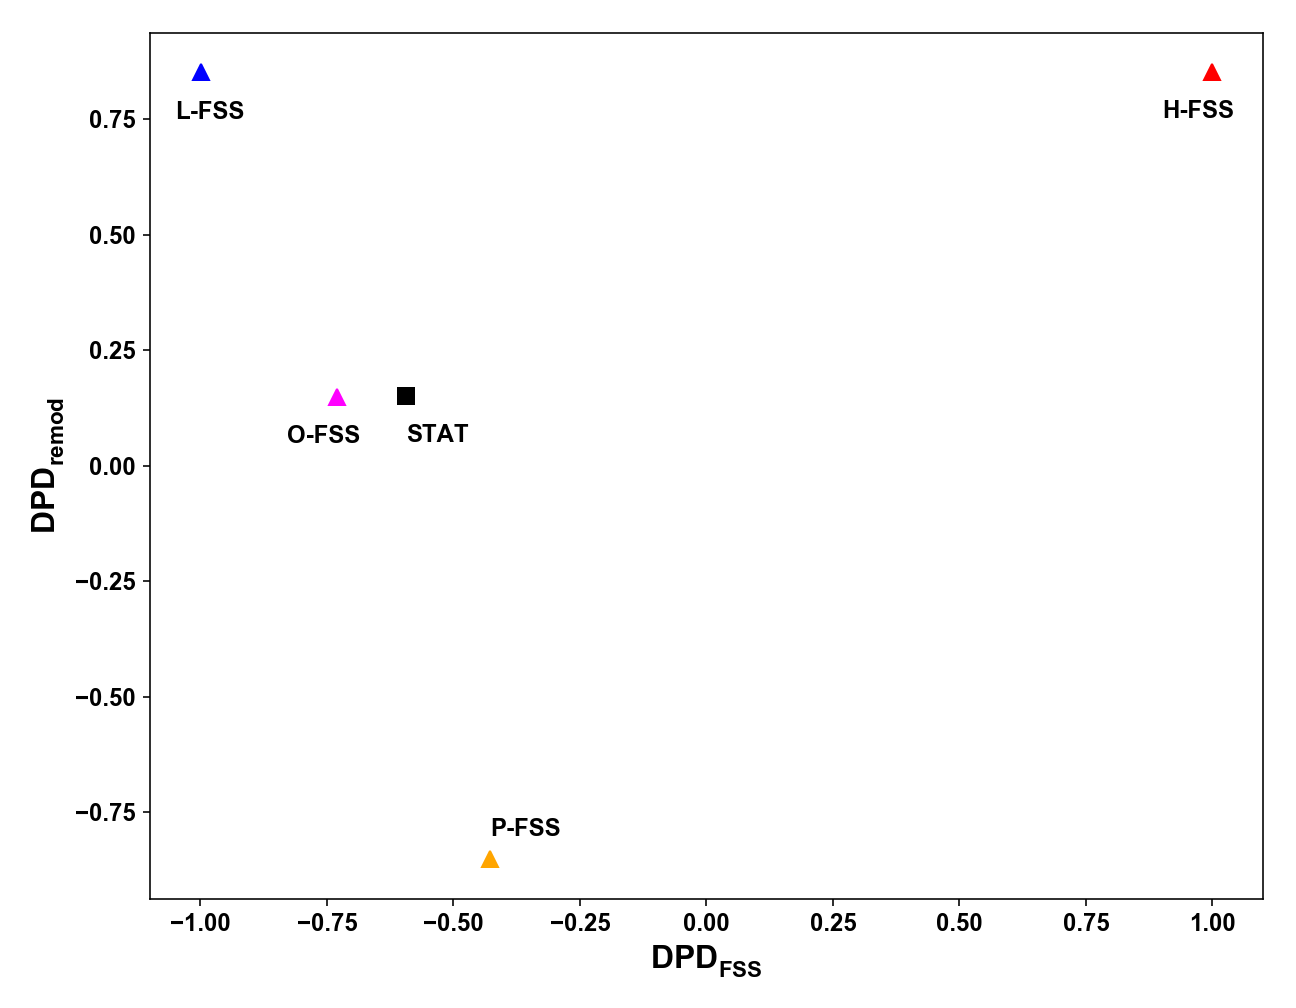

In [36]:
# 2D DPD visualization


fig = plt.figure(figsize=(9,7))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

#plt.suptitle('PhosphoSite fold changes',**fontTitle)

ax.plot(np.asarray(DPD_vals.loc['HSS_vs_STAT'].iloc[0])/max(DPD_vals['DPD_FSS']),np.asarray(DPD_vals.loc['HSS_vs_STAT'].iloc[1])/max(DPD_vals['DPD_remod']),'^',color='red',label='HSS',ms=8)
ax.annotate('H-FSS',((DPD_vals.loc['HSS_vs_STAT'].iloc[0])/max(DPD_vals['DPD_FSS'])-0.1,-0.1+(DPD_vals.loc['HSS_vs_STAT'].iloc[1])/max(DPD_vals['DPD_remod'])))
ax.plot(np.asarray(DPD_vals.loc['LSS_vs_STAT'].iloc[0])/max(DPD_vals['DPD_FSS']),np.asarray(DPD_vals.loc['LSS_vs_STAT'].iloc[1])/max(DPD_vals['DPD_remod']),'^',color='blue',label='LSS',ms=8)
ax.annotate('L-FSS',((DPD_vals.loc['LSS_vs_STAT'].iloc[0])/max(DPD_vals['DPD_FSS'])-0.05,-0.1+(DPD_vals.loc['LSS_vs_STAT'].iloc[1])/max(DPD_vals['DPD_remod'])))
ax.plot(np.asarray(DPD_vals.loc['OSS_vs_STAT'].iloc[0])/max(DPD_vals['DPD_FSS']),np.asarray(DPD_vals.loc['OSS_vs_STAT'].iloc[1])/max(DPD_vals['DPD_remod']),'^',color='magenta',label='OSS',ms=8)
ax.annotate('O-FSS',((DPD_vals.loc['OSS_vs_STAT'].iloc[0])/max(DPD_vals['DPD_FSS'])-0.1,-0.1+(DPD_vals.loc['OSS_vs_STAT'].iloc[1])/max(DPD_vals['DPD_remod'])))
ax.plot(np.asarray(DPD_vals.loc['PSS_vs_STAT'].iloc[0])/max(DPD_vals['DPD_FSS']),np.asarray(DPD_vals.loc['PSS_vs_STAT'].iloc[1])/max(DPD_vals['DPD_remod']),'^',color='orange',label='PSS',ms=8)
ax.annotate('P-FSS',((DPD_vals.loc['PSS_vs_STAT'].iloc[0])/max(DPD_vals['DPD_FSS'])-0.0,0.05+(DPD_vals.loc['PSS_vs_STAT'].iloc[1])/max(DPD_vals['DPD_remod'])))
ax.plot(np.asarray(DPD_vals.loc['STAT_vs_STAT'].iloc[0])/max(DPD_vals['DPD_FSS']),np.asarray(DPD_vals.loc['STAT_vs_STAT'].iloc[1])/max(DPD_vals['DPD_remod']),'s',color='black',label='STAT',ms=8)
ax.annotate('STAT',((DPD_vals.loc['STAT_vs_STAT'].iloc[0])/max(DPD_vals['DPD_FSS'])-0.0,-0.1+(DPD_vals.loc['STAT_vs_STAT'].iloc[1])/max(DPD_vals['DPD_remod'])))


#for smpl in drugs12pert.index:
#    ax.annotate(RPPA_legend.loc[smpl]['Sample Description (drug abbre. | dose or time-point)'],(PCA_TPM.loc[smpl][0],PCA_TPM.loc[smpl][1]))

ax.set_xlabel('$\mathregular{DPD_{FSS}}$',**fontLabel)
ax.set_ylabel('$\mathregular{DPD_{remod}}$',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

#ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.tight_layout()
plt.show()



<IPython.core.display.Javascript object>


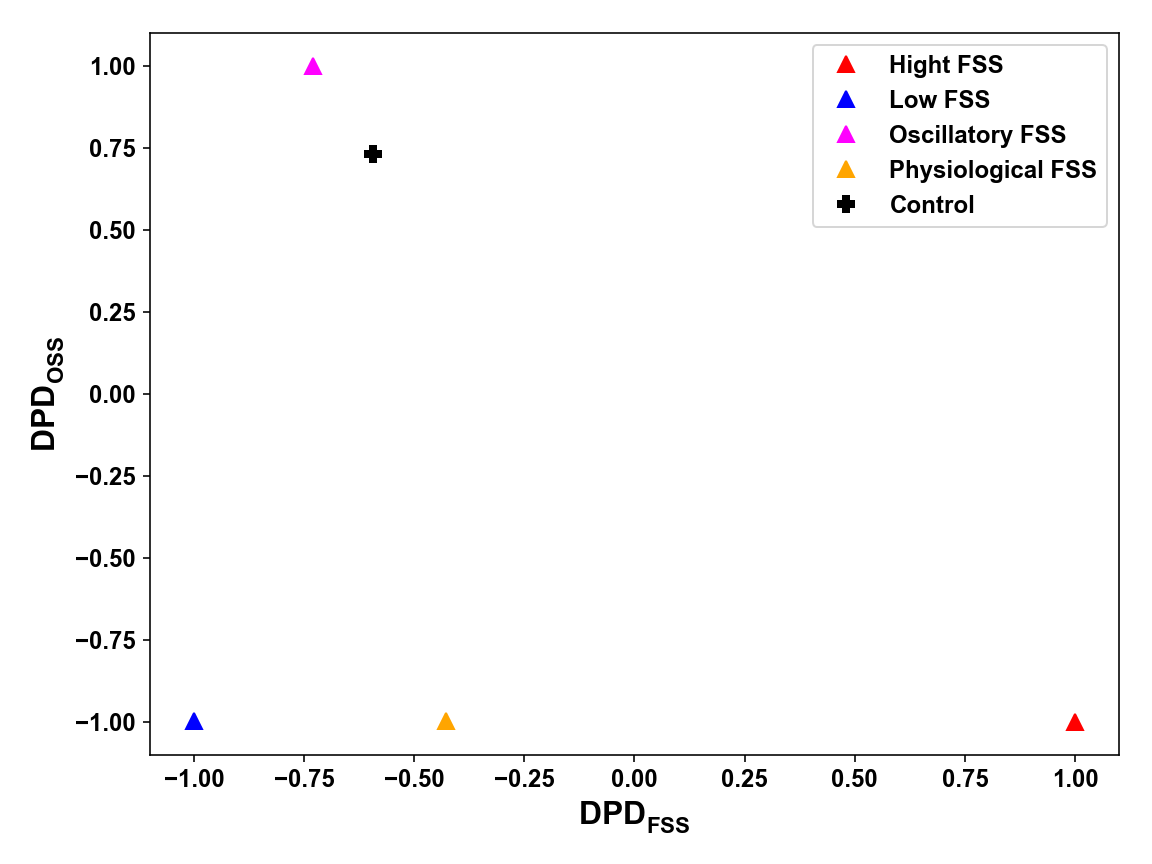

In [37]:
# 2D DPD visualization


fig = plt.figure(figsize=(8,6))
#ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

#plt.suptitle('PhosphoSite fold changes',**fontTitle)

ax.plot(np.asarray(DPD_vals.loc['HSS_vs_STAT'].iloc[0])/max(DPD_vals['DPD_FSS']),np.asarray(DPD_vals.loc['HSS_vs_STAT'].iloc[2])/max(DPD_vals['DPD_OSS']),'^',color='red',label='Hight FSS',ms=8)
#ax.annotate('H-FSS',((DPD_vals.loc['HSS_vs_STAT'].iloc[0])/max(DPD_vals['DPD_FSS'])-0.1,0.05+(DPD_vals.loc['HSS_vs_STAT'].iloc[2])/max(DPD_vals['DPD_OSS'])))
ax.plot(np.asarray(DPD_vals.loc['LSS_vs_STAT'].iloc[0])/max(DPD_vals['DPD_FSS']),np.asarray(DPD_vals.loc['LSS_vs_STAT'].iloc[2])/max(DPD_vals['DPD_OSS']),'^',color='blue',label='Low FSS',ms=8)
#ax.annotate('L-FSS',((DPD_vals.loc['LSS_vs_STAT'].iloc[0])/max(DPD_vals['DPD_FSS'])-0.05,0.05+(DPD_vals.loc['LSS_vs_STAT'].iloc[2])/max(DPD_vals['DPD_OSS'])))
ax.plot(np.asarray(DPD_vals.loc['OSS_vs_STAT'].iloc[0])/max(DPD_vals['DPD_FSS']),np.asarray(DPD_vals.loc['OSS_vs_STAT'].iloc[2])/max(DPD_vals['DPD_OSS']),'^',color='magenta',label='Oscillatory FSS',ms=8)
#ax.annotate('O-FSS',((DPD_vals.loc['OSS_vs_STAT'].iloc[0])/max(DPD_vals['DPD_FSS'])-0.1,-0.1+(DPD_vals.loc['OSS_vs_STAT'].iloc[2])/max(DPD_vals['DPD_OSS'])))
ax.plot(np.asarray(DPD_vals.loc['PSS_vs_STAT'].iloc[0])/max(DPD_vals['DPD_FSS']),np.asarray(DPD_vals.loc['PSS_vs_STAT'].iloc[2])/max(DPD_vals['DPD_OSS']),'^',color='orange',label='Physiological FSS',ms=8)
#ax.annotate('P-FSS',((DPD_vals.loc['PSS_vs_STAT'].iloc[0])/max(DPD_vals['DPD_FSS'])-0.0,0.05+(DPD_vals.loc['PSS_vs_STAT'].iloc[2])/max(DPD_vals['DPD_OSS'])))
ax.plot(np.asarray(DPD_vals.loc['STAT_vs_STAT'].iloc[0])/max(DPD_vals['DPD_FSS']),np.asarray(DPD_vals.loc['STAT_vs_STAT'].iloc[2])/max(DPD_vals['DPD_OSS']),'P',color='black',label='Control',ms=8)
#ax.annotate('STAT',((DPD_vals.loc['STAT_vs_STAT'].iloc[0])/max(DPD_vals['DPD_FSS'])-0.0,-0.1+(DPD_vals.loc['STAT_vs_STAT'].iloc[2])/max(DPD_vals['DPD_OSS'])))


#for smpl in drugs12pert.index:
#    ax.annotate(RPPA_legend.loc[smpl]['Sample Description (drug abbre. | dose or time-point)'],(PCA_TPM.loc[smpl][0],PCA_TPM.loc[smpl][1]))

ax.set_xlabel('$\mathregular{DPD_{FSS}}$',**fontLabel)
ax.set_ylabel('$\mathregular{DPD_{OSS}}$',**fontLabel)
#ax.set_zlabel('PC3',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.tight_layout()
plt.show()



<IPython.core.display.Javascript object>


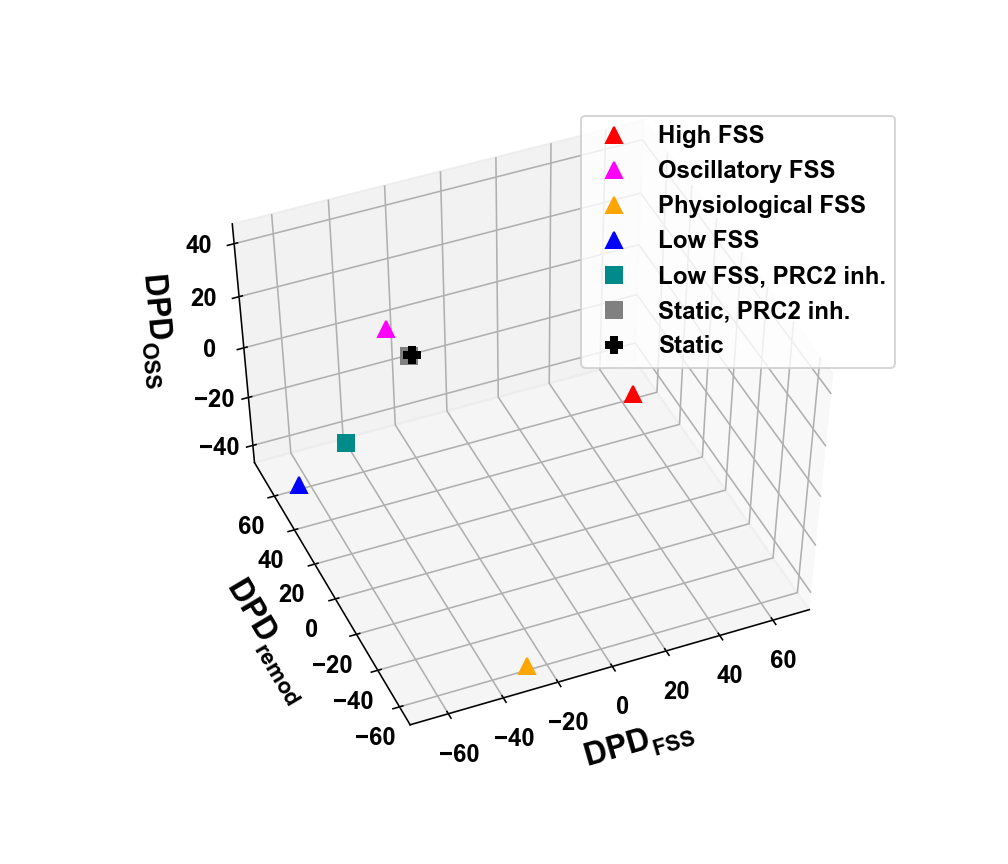

In [37]:
# 3D visualization


fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')
#ax = fig.add_subplot(111)

fontTitle = {'family' : 'Arial', 'weight' : 'bold', 'size' : 18} 
fontLabel = {'family' : 'Arial', 'weight' : 'bold', 'size' : 16} 
fontAxes =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
fontLegend =  {'family' : 'Arial', 'weight' : 'bold', 'size' : 12} 
plt.rc('font', **fontAxes)

#plt.suptitle('PhosphoSite fold changes',**fontTitle)

ax.plot([DPD_vals.loc['HSS_vs_STAT'].iloc[0]],[DPD_vals.loc['HSS_vs_STAT'].iloc[1]],[DPD_vals.loc['HSS_vs_STAT'].iloc[2]],'^',color='red',label='High FSS',ms=8)
ax.plot([DPD_vals.loc['OSS_vs_STAT'].iloc[0]],[DPD_vals.loc['OSS_vs_STAT'].iloc[1]],[DPD_vals.loc['OSS_vs_STAT'].iloc[2]],'^',color='magenta',label='Oscillatory FSS',ms=8)
ax.plot([DPD_vals.loc['PSS_vs_STAT'].iloc[0]],[DPD_vals.loc['PSS_vs_STAT'].iloc[1]],[DPD_vals.loc['PSS_vs_STAT'].iloc[2]],'^',color='orange',label='Physiological FSS',ms=8)
ax.plot([DPD_vals.loc['LSS_vs_STAT'].iloc[0]],[DPD_vals.loc['LSS_vs_STAT'].iloc[1]],[DPD_vals.loc['LSS_vs_STAT'].iloc[2]],'^',color='blue',label='Low FSS',ms=8)

#ax.plot([DPD_vals.loc['Ntsilow_vs_STAT'].iloc[0]],[DPD_vals.loc['Ntsilow_vs_STAT'].iloc[1]],'o',color='navy',label='Low FSS, PRC2 KN series',ms=8)
#ax.plot([DPD_vals.loc['Ezsilow_vs_STAT'].iloc[0]],[DPD_vals.loc['Ezsilow_vs_STAT'].iloc[1]],'o',color='cyan',label='Low FSS, EZH2 KN',ms=8)
#ax.plot([DPD_vals.loc['Suzsilow_vs_STAT'].iloc[0]],[DPD_vals.loc['Suzsilow_vs_STAT'].iloc[1]],'o',color='darkcyan',label='Low FSS, SUZ12 KN',ms=8)
#ax.plot([DPD_vals.loc['NoTzLS_vs_STAT'].iloc[0]],[DPD_vals.loc['NoTzLS_vs_STAT'].iloc[1]],'s',color='navy',label='Low FSS, Tazemostat series',ms=8)
ax.plot([DPD_vals.loc['Plus_TzLS_vs_STAT'].iloc[0]],[DPD_vals.loc['Plus_TzLS_vs_STAT'].iloc[1]],[DPD_vals.loc['Plus_TzLS_vs_STAT'].iloc[2]],'s',color='darkcyan',label='Low FSS, PRC2 inh.',ms=8)

#ax.plot([DPD_vals.loc['EzsiSt_vs_STAT'].iloc[0]],[DPD_vals.loc['EzsiSt_vs_STAT'].iloc[1]],[DPD_vals.loc['EzsiSt_vs_STAT'].iloc[2]],'o',color='lightgrey',label='STAT, EZH2 KN',ms=8)
#ax.plot([DPD_vals.loc['SuzsiSt_vs_STAT'].iloc[0]],[DPD_vals.loc['SuzsiSt_vs_STAT'].iloc[1]],[DPD_vals.loc['SuzsiSt_vs_STAT'].iloc[2]],'o',color='grey',label='STAT, SUZ12 KN',ms=8)
ax.plot([DPD_vals.loc['Plus_TzSt_vs_STAT'].iloc[0]],[DPD_vals.loc['Plus_TzSt_vs_STAT'].iloc[1]],[DPD_vals.loc['Plus_TzSt_vs_STAT'].iloc[2]],'s',color='grey',label='Static, PRC2 inh.',ms=8)

ax.plot([DPD_vals.loc['STAT_vs_STAT'].iloc[0]],[DPD_vals.loc['STAT_vs_STAT'].iloc[1]],[DPD_vals.loc['STAT_vs_STAT'].iloc[2]],'P',color='black',label='Static',ms=8)
#ax.plot([DPD_vals.loc['si_vs_wt'].iloc[0]],[DPD_vals.loc['si_vs_wt'].iloc[1]],'P',color='lightgrey',label='STAT, NT siRNA',ms=8)
#ax.plot([DPD_vals.loc['sg_vs_wt'].iloc[0]],[DPD_vals.loc['sg_vs_wt'].iloc[1]],'P',color='grey',label='STAT, NT sgRNA',ms=8)


#for smpl in drugs12pert.index:
#    ax.annotate(RPPA_legend.loc[smpl]['Sample Description (drug abbre. | dose or time-point)'],(PCA_TPM.loc[smpl][0],PCA_TPM.loc[smpl][1]))

ax.set_xlabel('\n$\mathregular{DPD_{FSS}}$',**fontLabel)
ax.set_ylabel('\n$\mathregular{DPD_{remod}}$',**fontLabel)
ax.set_zlabel('\n$\mathregular{DPD_{OSS}}$',**fontLabel)

#ax.set_xlim(-15,35)
#ax.set_ylim(-16,25)

ax.legend(numpoints=1,prop=fontLegend,ncol=1)
plt.show()



In [39]:
# calculate gene contributions


In [40]:
total_wide

Symbol,A1BG,A1BG-AS1,A2M,A2M-AS1,A4GALT,AAAS,AAAS_1,AACS,AADAC,AADACP1,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZYX_1,ZZEF1,ZZZ3
Condition,,,,,,,,,,,,,,,,,,,,,
EzsiSt_vs_STAT,0.000000,0.000000,0.878084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.201891,0.248122,0.227079,0.000000,0.000000
Ezsilow_vs_STAT,0.000000,-3.836974,0.721672,0.000000,-0.543100,-0.329317,0.000000,-0.413289,1.522015,1.293113,...,0.000000,0.000000,0.000000,0.365317,0.000000,-0.145964,0.966268,0.973464,0.337084,-0.539051
HSS_vs_STAT,0.000000,0.000000,1.002831,-1.270739,0.000000,-0.621394,-0.754382,0.000000,0.000000,0.000000,...,0.681756,-0.717565,0.000000,0.994218,0.000000,0.000000,1.174678,1.242858,0.806451,0.000000
LSS_vs_STAT,0.000000,0.000000,-0.821225,0.000000,-0.603028,-1.071432,-1.024142,-0.417962,0.000000,0.000000,...,-0.877941,0.000000,0.000000,0.999536,0.000000,0.000000,0.923735,0.960641,0.586130,0.000000
NoTzLS_vs_STAT,0.000000,0.000000,0.774399,-1.374863,-1.057965,-0.471491,-0.688529,-0.366281,0.000000,0.945570,...,0.400081,0.000000,0.505315,0.691086,0.000000,-0.244784,0.621419,0.550946,0.561672,-0.229899
Ntsilow_vs_STAT,0.000000,0.000000,0.000000,0.000000,-0.740619,-0.350265,0.000000,-0.321615,0.000000,0.845001,...,0.000000,0.000000,0.000000,0.535042,0.000000,0.000000,0.836232,0.833882,0.474604,-0.397460
OSS_vs_STAT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.629960,0.684052,0.000000,0.000000
PSS_vs_STAT,0.000000,0.000000,0.000000,-2.130666,0.000000,-0.958575,-0.983210,0.000000,2.501492,1.148968,...,-1.114237,0.000000,0.000000,0.815359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Plus_TzLS_vs_STAT,0.000000,0.000000,0.833213,0.000000,-0.296333,-0.453656,-0.995599,-0.449994,0.000000,0.446485,...,-0.490745,-0.372082,0.591749,0.730088,0.000000,-0.457150,0.819076,0.803460,0.000000,-0.529754


In [41]:
#calculating perturbation vector by subtracting from perturbed vector the initial one

total_wide.loc['EZLSS_vs_LSS'] = total_wide.loc['Ezsilow_vs_STAT'].subtract(total_wide.loc['Ntsilow_vs_STAT'])
total_wide.loc['SUZLSS_vs_LSS'] = total_wide.loc['Suzsilow_vs_STAT'].subtract(total_wide.loc['Ntsilow_vs_STAT'])
total_wide.loc['TZLSS_vs_LSS'] = total_wide.loc['Plus_TzLS_vs_STAT'].subtract(total_wide.loc['NoTzLS_vs_STAT'])
total_wide.loc['OSS_vs_PSS'] = total_wide.loc['OSS_vs_STAT'].subtract(total_wide.loc['PSS_vs_STAT'])
total_wide.loc['HSS_vs_LSS'] = total_wide.loc['HSS_vs_STAT'].subtract(total_wide.loc[['LSS_vs_STAT','NoTzLS_vs_STAT','Ntsilow_vs_STAT']].mean(axis='index'))
total_wide.loc['HSS_vs_PSS'] = total_wide.loc['HSS_vs_STAT'].subtract(total_wide.loc['PSS_vs_STAT'])
total_wide.loc['LSS_vs_PSS'] = total_wide.loc[['LSS_vs_STAT','NoTzLS_vs_STAT','Ntsilow_vs_STAT']].mean(axis='index').subtract(total_wide.loc['PSS_vs_STAT'])
total_wide.loc['LSS_vs_OSS'] = total_wide.loc[['LSS_vs_STAT','NoTzLS_vs_STAT','Ntsilow_vs_STAT']].mean(axis='index').subtract(total_wide.loc['OSS_vs_STAT'])


total_wide.T.to_csv('RNAseq_vs_STAT_wide_ed.csv')
total_wide

Symbol,A1BG,A1BG-AS1,A2M,A2M-AS1,A4GALT,AAAS,AAAS_1,AACS,AADAC,AADACP1,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZYX_1,ZZEF1,ZZZ3
Condition,,,,,,,,,,,,,,,,,,,,,
EzsiSt_vs_STAT,0.000000,0.000000,0.878084,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.201891,0.248122,0.227079,0.000000,0.000000
Ezsilow_vs_STAT,0.000000,-3.836974,0.721672,0.000000,-0.543100,-0.329317,0.000000,-0.413289,1.522015,1.293113,...,0.000000,0.000000,0.000000,0.365317,0.000000,-0.145964,0.966268,0.973464,0.337084,-0.539051
HSS_vs_STAT,0.000000,0.000000,1.002831,-1.270739,0.000000,-0.621394,-0.754382,0.000000,0.000000,0.000000,...,0.681756,-0.717565,0.000000,0.994218,0.000000,0.000000,1.174678,1.242858,0.806451,0.000000
LSS_vs_STAT,0.000000,0.000000,-0.821225,0.000000,-0.603028,-1.071432,-1.024142,-0.417962,0.000000,0.000000,...,-0.877941,0.000000,0.000000,0.999536,0.000000,0.000000,0.923735,0.960641,0.586130,0.000000
NoTzLS_vs_STAT,0.000000,0.000000,0.774399,-1.374863,-1.057965,-0.471491,-0.688529,-0.366281,0.000000,0.945570,...,0.400081,0.000000,0.505315,0.691086,0.000000,-0.244784,0.621419,0.550946,0.561672,-0.229899
Ntsilow_vs_STAT,0.000000,0.000000,0.000000,0.000000,-0.740619,-0.350265,0.000000,-0.321615,0.000000,0.845001,...,0.000000,0.000000,0.000000,0.535042,0.000000,0.000000,0.836232,0.833882,0.474604,-0.397460
OSS_vs_STAT,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.629960,0.684052,0.000000,0.000000
PSS_vs_STAT,0.000000,0.000000,0.000000,-2.130666,0.000000,-0.958575,-0.983210,0.000000,2.501492,1.148968,...,-1.114237,0.000000,0.000000,0.815359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Plus_TzLS_vs_STAT,0.000000,0.000000,0.833213,0.000000,-0.296333,-0.453656,-0.995599,-0.449994,0.000000,0.446485,...,-0.490745,-0.372082,0.591749,0.730088,0.000000,-0.457150,0.819076,0.803460,0.000000,-0.529754


In [42]:
#calculating gene contributions by multiplying each components of it (i.e. each gene) on appropriate value in STV

geneconts_df = pd.DataFrame(columns=total_wide.columns)
scale_factor = 1

geneconts_df.loc['EZLSS_vs_LSS_FSS'] = scale_factor*total_wide.loc['EZLSS_vs_LSS']*norm_vec_df['norm_vec_FSS']
geneconts_df.loc['EZLSS_vs_LSS_remod'] = scale_factor*total_wide.loc['EZLSS_vs_LSS']*norm_vec_df['norm_vec_remod']
geneconts_df.loc['EZLSS_vs_LSS_OSS'] = scale_factor*total_wide.loc['EZLSS_vs_LSS']*norm_vec_df['norm_vec_OSS']

geneconts_df.loc['SUZLSS_vs_LSS_FSS'] = scale_factor*total_wide.loc['SUZLSS_vs_LSS']*norm_vec_df['norm_vec_FSS']
geneconts_df.loc['SUZLSS_vs_LSS_remod'] = scale_factor*total_wide.loc['SUZLSS_vs_LSS']*norm_vec_df['norm_vec_remod']
geneconts_df.loc['SUZLSS_vs_LSS_OSS'] = scale_factor*total_wide.loc['SUZLSS_vs_LSS']*norm_vec_df['norm_vec_OSS']

geneconts_df.loc['TZLSS_vs_LSS_FSS'] = scale_factor*total_wide.loc['TZLSS_vs_LSS']*norm_vec_df['norm_vec_FSS']
geneconts_df.loc['TZLSS_vs_LSS_remod'] = scale_factor*total_wide.loc['TZLSS_vs_LSS']*norm_vec_df['norm_vec_remod']
geneconts_df.loc['TZLSS_vs_LSS_OSS'] = scale_factor*total_wide.loc['TZLSS_vs_LSS']*norm_vec_df['norm_vec_OSS']

geneconts_df.loc['OSS_vs_PSS_FSS'] = scale_factor*total_wide.loc['OSS_vs_PSS']*norm_vec_df['norm_vec_FSS']
geneconts_df.loc['OSS_vs_PSS_remod'] = scale_factor*total_wide.loc['OSS_vs_PSS']*norm_vec_df['norm_vec_remod']
geneconts_df.loc['OSS_vs_PSS_OSS'] = scale_factor*total_wide.loc['OSS_vs_PSS']*norm_vec_df['norm_vec_OSS']

geneconts_df.loc['HSS_vs_LSS_FSS'] = scale_factor*total_wide.loc['HSS_vs_LSS']*norm_vec_df['norm_vec_FSS']
geneconts_df.loc['HSS_vs_LSS_remod'] = scale_factor*total_wide.loc['HSS_vs_LSS']*norm_vec_df['norm_vec_remod']
geneconts_df.loc['HSS_vs_LSS_OSS'] = scale_factor*total_wide.loc['HSS_vs_LSS']*norm_vec_df['norm_vec_OSS']

geneconts_df.loc['HSS_vs_PSS_FSS'] = scale_factor*total_wide.loc['HSS_vs_PSS']*norm_vec_df['norm_vec_FSS']
geneconts_df.loc['HSS_vs_PSS_remod'] = scale_factor*total_wide.loc['HSS_vs_PSS']*norm_vec_df['norm_vec_remod']
geneconts_df.loc['HSS_vs_PSS_OSS'] = scale_factor*total_wide.loc['HSS_vs_PSS']*norm_vec_df['norm_vec_OSS']

geneconts_df.loc['LSS_vs_PSS_FSS'] = scale_factor*total_wide.loc['LSS_vs_PSS']*norm_vec_df['norm_vec_FSS']
geneconts_df.loc['LSS_vs_PSS_remod'] = scale_factor*total_wide.loc['LSS_vs_PSS']*norm_vec_df['norm_vec_remod']
geneconts_df.loc['LSS_vs_PSS_OSS'] = scale_factor*total_wide.loc['LSS_vs_PSS']*norm_vec_df['norm_vec_OSS']

geneconts_df.loc['LSS_vs_OSS_FSS'] = scale_factor*total_wide.loc['LSS_vs_OSS']*norm_vec_df['norm_vec_FSS']
geneconts_df.loc['LSS_vs_OSS_remod'] = scale_factor*total_wide.loc['LSS_vs_OSS']*norm_vec_df['norm_vec_remod']
geneconts_df.loc['LSS_vs_OSS_OSS'] = scale_factor*total_wide.loc['LSS_vs_OSS']*norm_vec_df['norm_vec_OSS']


geneconts_df.T.to_csv('genecontributions.csv')
geneconts_df

Symbol,A1BG,A1BG-AS1,A2M,A2M-AS1,A4GALT,AAAS,AAAS_1,AACS,AADAC,AADACP1,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZYX_1,ZZEF1,ZZZ3
EZLSS_vs_LSS_FSS,0.0,-0.0,0.006491,-0.000000,0.001193,0.000022,-0.000000,-0.000274,0.000000,-0.001565,...,0.000000,-0.000000,-0.000000,-0.000225,0.0,-0.000094,0.000370,0.000477,-0.000262,-0.000153
EZLSS_vs_LSS_remod,0.0,-0.0,0.000565,0.000000,-0.000859,0.000043,0.000000,0.000207,-0.031661,-0.003140,...,0.000000,-0.000000,0.000000,-0.000062,0.0,0.000042,0.001011,0.001112,-0.000712,0.000134
EZLSS_vs_LSS_OSS,0.0,-0.0,0.000594,0.000000,0.000931,0.000179,0.000000,-0.000211,-0.017277,-0.003859,...,0.000000,0.000000,-0.000000,0.001453,0.0,-0.000044,0.000197,0.000293,0.000483,-0.000189
SUZLSS_vs_LSS_FSS,0.0,0.0,0.010885,-0.000000,0.004472,-0.000147,-0.000000,0.000085,0.000000,-0.001192,...,0.000000,-0.000000,-0.000253,-0.000221,0.0,0.000000,0.000179,0.000132,-0.000383,-0.000264
SUZLSS_vs_LSS_remod,0.0,0.0,0.000947,0.000000,-0.003220,-0.000287,0.000000,-0.000064,-0.026914,-0.002393,...,0.000000,-0.000000,0.000114,-0.000061,0.0,-0.000000,0.000489,0.000307,-0.001040,0.000231
SUZLSS_vs_LSS_OSS,0.0,0.0,0.000996,0.000000,0.003490,-0.001190,0.000000,0.000066,-0.014686,-0.002940,...,0.000000,0.000000,-0.000120,0.001427,0.0,0.000000,0.000095,0.000081,0.000705,-0.000325
TZLSS_vs_LSS_FSS,0.0,0.0,0.000529,-0.008612,0.004599,0.000019,0.000005,-0.000251,0.000000,0.001743,...,-0.006864,0.002073,-0.000114,0.000052,0.0,-0.000136,0.000562,0.000863,-0.001072,-0.000324
TZLSS_vs_LSS_remod,0.0,0.0,0.000046,0.017981,-0.003311,0.000037,-0.000748,0.000189,-0.000000,0.003498,...,-0.007724,0.000636,0.000051,0.000014,0.0,0.000061,0.001537,0.002011,-0.002910,0.000284
TZLSS_vs_LSS_OSS,0.0,0.0,0.000048,0.015973,0.003589,0.000153,-0.002434,-0.000193,-0.000000,0.004297,...,-0.005827,-0.000052,-0.000054,-0.000334,0.0,-0.000064,0.000299,0.000531,0.001973,-0.000399
OSS_vs_PSS_FSS,0.0,0.0,0.000000,-0.013346,0.000000,0.001012,-0.000016,0.000000,-0.000000,0.004012,...,0.008585,-0.000000,-0.000000,-0.001080,0.0,0.000000,0.001792,0.002337,0.000000,0.000000


In [81]:
common_number=50
genes_candidates_df = pd.DataFrame(columns=['HSS_vs_LSS_FSS','HSS_vs_PSS_FSS','LSS_vs_PSS_FSS','common_FSS','HSS_vs_PSS_remod','LSS_vs_PSS_remod','common_remod','OSS_vs_PSS_OSS','common_total'])

for cont_col in genes_candidates_df.filter(regex='_vs_',axis='columns').columns:
    if cont_col == 'LSS_vs_PSS_FSS':
        genes_candidates_df[cont_col] = geneconts_df.T.sort_values(by=cont_col,ascending=True)[cont_col][:common_number].index
    else:
        genes_candidates_df[cont_col] = geneconts_df.T.sort_values(by=cont_col,ascending=False)[cont_col][:common_number].index

common_genes = list(set(genes_candidates_df['HSS_vs_LSS_FSS']) & set(genes_candidates_df['HSS_vs_PSS_FSS']) & set(genes_candidates_df['LSS_vs_PSS_FSS']))
genes_candidates_df['common_FSS'][:len(common_genes)] = common_genes

common_genes = list(set(genes_candidates_df['HSS_vs_PSS_remod']) & set(genes_candidates_df['LSS_vs_PSS_remod']))
genes_candidates_df['common_remod'][:len(common_genes)] = common_genes

common_genes = list(set(genes_candidates_df['common_FSS']) & set(genes_candidates_df['common_remod']))
genes_candidates_df['common_total'][:len(common_genes)] = common_genes

genes_candidates_df.to_csv('genes_to_measure.csv',index=False)
display(genes_candidates_df)


,HSS_vs_LSS_FSS,HSS_vs_PSS_FSS,LSS_vs_PSS_FSS,common_FSS,HSS_vs_PSS_remod,LSS_vs_PSS_remod,common_remod,OSS_vs_PSS_OSS,common_total
0,STAC2,HSPA7,C12orf50,STAC2,SAMD11,LCN10,LCN10,WNT9B,NaN
1,HSPA7,XIRP1,HS3ST2,NaN,LCN10,SAMD11,KRT7-AS,WNT9B_1,NaN
2,C12orf50,TRH,LOC124902208,NaN,TRAF3IP3,TRAF3IP3,LHFPL3-AS2,GALNT15,NaN
3,HS3ST2,STAC2,PI16,NaN,KRT7-AS,DLX2,LINC02679,GPR183,NaN
4,XIRP1,LOC441086,DGKK,NaN,PSMB9_2,STATH,LINC02365,S100P,NaN
5,TRH,SALL3_2,WNT9B_1,NaN,LINC00161,LOC124902208,DLX2,LOC124909392,NaN
6,LOC441086,KRTAP5-AS1,LOC124901256,NaN,DLX2,PI16,LINC00161,LOC105375509,NaN
7,SALL3_2,ADCY2,STATH,NaN,CYP1B1,PSMB9_2,OPN1SW,LINC02880,NaN
8,ADCY2,OVOL1,LOC101927057,NaN,LOC107987180,LOC100128593,MUC20_7,ADM2,NaN
9,LOC124902208,LINC01133,WNT9B,NaN,LOC100128593,LINC00536,LOC100128593,LOC107985528,NaN
